# Reproducing “Flavor network and the principles of food pairing” by Ahn et al.

In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import itertools

%matplotlib inline

## Reading in the Data

Data can be found in the supplemental materials of the Ahn et al. paper.

In [2]:
common_flavors_df = pd.read_csv('srep00196-s2.csv', skiprows=range(3))
common_flavors_df

,,#
black_sesame_seed,rose_wine,3
fennel,wild_berry,5
comte_cheese,grape,57
nira,raw_beef,1
corn_mint_oil,parsnip_fruit,2
...,...,...
eucalyptus_dives,peppermint,1
clam,orange_juice,6
raw_lamb,roasted_spanish_peanut,1
bacon,cashew,6


In [3]:
common_flavors_df = common_flavors_df.reset_index().rename({'level_0':'ingredient_1', 'level_1':'ingredient_2'}, axis=1)
common_flavors_df


,ingredient_1,ingredient_2,#
0,black_sesame_seed,rose_wine,3
1,fennel,wild_berry,5
2,comte_cheese,grape,57
3,nira,raw_beef,1
4,corn_mint_oil,parsnip_fruit,2
...,...,...,...
221772,eucalyptus_dives,peppermint,1
221773,clam,orange_juice,6
221774,raw_lamb,roasted_spanish_peanut,1
221775,bacon,cashew,6


In [4]:
# Input
data_file = "srep00196-s3.csv"

# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1
        
        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
recipes_df = pd.read_csv(data_file, skiprows=range(4), names=['region'] + column_names[:-1])
recipes_df

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_2591/4185306732.py:26: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  recipes_df = pd.read_csv(data_file, skiprows=range(4), names=['region'] + column_names[:-1])


,region,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,African,chicken,cinnamon,soy_sauce,onion,ginger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African,cane_molasses,ginger,cumin,garlic,tamarind,bread,coriander,vinegar,onion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,African,butter,pepper,onion,cardamom,cayenne,ginger,cottage_cheese,garlic,brassica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,African,olive_oil,pepper,wheat,beef,onion,cardamom,cumin,garlic,rice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,African,honey,wheat,yeast,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56493,WesternEuropean,cane_molasses,butter,wheat,whiskey,vanilla,egg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56494,WesternEuropean,lemon_juice,wheat,onion,parsley,celery,nutmeg,vegetable_oil,chicken,egg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56495,WesternEuropean,butter,wheat,onion,beef,bacon,black_pepper,parsley,beer,garlic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56496,WesternEuropean,lemon,onion,black_pepper,white_wine,celery,carrot,mussel,bay,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
shrimp_scampi_and_tomato_boil = ['shrimp', 'white_wine', 'mozzarella_cheese', 'parmesan_cheese', 'olive_oil',\
                                 'parsley', 'tomato', 'garlic']
seasoned_mussels = ['garlic', 'scallion', 'sesame_oil', 'starch', 'soy_sauce', 'nut', 'black_pepper', 'sake', 'mussel']

shrimp_scampi_and_seasoned_mussels_df = common_flavors_df.loc[common_flavors_df['ingredient_1'].isin(shrimp_scampi_and_tomato_boil + seasoned_mussels)\
                                           & common_flavors_df['ingredient_2'].isin(shrimp_scampi_and_tomato_boil + seasoned_mussels)]

shrimp_scampi_and_seasoned_mussels_df

,ingredient_1,ingredient_2,#
4239,nut,shrimp,3
5589,nut,sesame_oil,1
6132,mozzarella_cheese,sake,15
7171,soy_sauce,tomato,2
8785,olive_oil,tomato,1
...,...,...,...
209438,mozzarella_cheese,white_wine,81
209978,parmesan_cheese,shrimp,42
212570,sake,shrimp,10
216157,mussel,tomato,7


## Figure B

(B) If we project the ingredient-compound bipartite network into the ingredient space, we obtain the flavor network, whose nodes are ingredients, linked if they share at least one flavor compound. The thickness of links represents the number of flavor compounds two ingredients share and the size of each circle corresponds to the prevalence of the ingredients in recipes. 

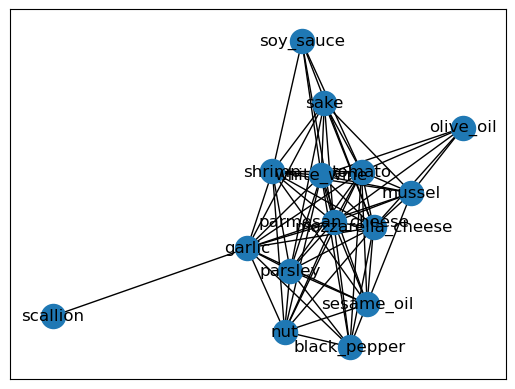

In [6]:
shrimp_scampi_and_seasoned_mussels_g = nx.from_pandas_edgelist(shrimp_scampi_and_seasoned_mussels_df,source='ingredient_1', target = 'ingredient_2', edge_attr=True)
nx.draw_networkx(shrimp_scampi_and_seasoned_mussels_g)

In [7]:
string_to_check = 'garlic'

# Check if the string is present in any part of the DataFrame
recipes_df.apply(lambda row: row.astype(str).str.contains(string_to_check, case=False).any(), axis=1).mean()

0.2990017345746752

In [8]:
size_map = []
for i in shrimp_scampi_and_seasoned_mussels_g.nodes():
    size_map.append(recipes_df.apply(lambda row: row.astype(str).str.contains(i, case=False).any(), axis=1).mean())

KeyboardInterrupt: 

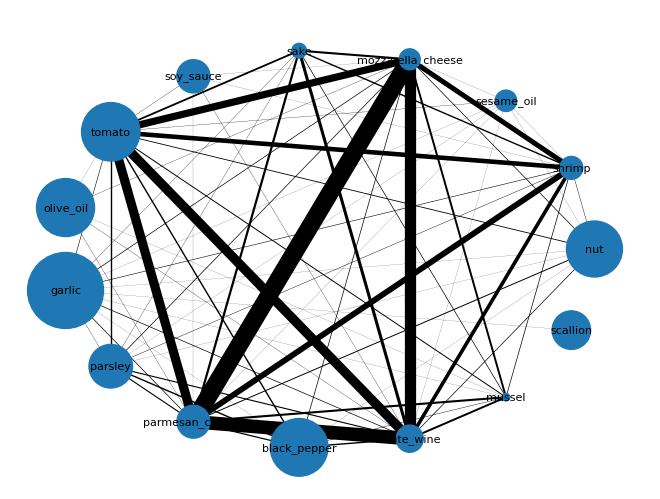

In [51]:
edges = shrimp_scampi_and_seasoned_mussels_g.edges()
weights = [shrimp_scampi_and_seasoned_mussels_g[u][v]['#']/10 for u,v in edges]
nx.draw_circular(shrimp_scampi_and_seasoned_mussels_g, with_labels=True, node_size=[i*10000 for i in size_map], font_size=8, width=weights)

## Figure C

(C) The distribution of recipe size, capturing the number of ingredients per recipe, across the five cuisines explored in our study.

In [5]:
recipes_df['region'].value_counts().index

Index(['NorthAmerican', 'SouthernEuropean', 'LatinAmerican', 'WesternEuropean',
       'EastAsian', 'MiddleEastern', 'SouthAsian', 'SoutheastAsian',
       'EasternEuropean', 'African', 'NorthernEuropean'],
      dtype='object')

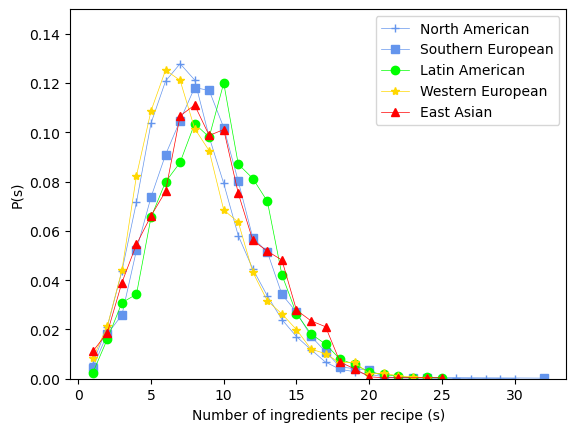

In [5]:
North_American_count_dist = (recipes_df.loc[recipes_df['region']=='NorthAmerican'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(North_American_count_dist.index, North_American_count_dist.values, '+-', c='cornflowerblue', label='North American', linewidth=.5) 

SouthernEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='SouthernEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(SouthernEuropean_count_dist.index, SouthernEuropean_count_dist.values, 's-', c='cornflowerblue', label='Southern European', linewidth=.5)

LatinAmerican_count_dist = (recipes_df.loc[recipes_df['region']=='LatinAmerican'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(LatinAmerican_count_dist.index, LatinAmerican_count_dist.values, 'o-', c='lime', label='Latin American', linewidth=.5)


WesternEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='WesternEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(WesternEuropean_count_dist.index, WesternEuropean_count_dist.values, '*-', c='gold', label='Western European', linewidth=.5)

EastAsian_count_dist = (recipes_df.loc[recipes_df['region']=='EastAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(EastAsian_count_dist.index, EastAsian_count_dist.values, '^-', c='red', label='East Asian', linewidth=.5)

MiddleEastern_count_dist = (recipes_df.loc[recipes_df['region']=='MiddleEastern'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


SouthAsian_count_dist = (recipes_df.loc[recipes_df['region']=='SouthAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


SoutheastAsian_count_dist = (recipes_df.loc[recipes_df['region']=='SoutheastAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


African_count_dist = (recipes_df.loc[recipes_df['region']=='African'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


NorthernEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='NorthernEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()

plt.ylim([0,.15])
plt.xlabel("Number of ingredients per recipe (s)")
plt.ylabel("P(s)")
plt.legend()

plt.show()


## Figure D

(D) The frequency-rank plot of ingredients across the five cuisines show an approximately invariant distribution across cuisines.

In [5]:
!python3.11 -m pip show pandas

Name: pandas
Version: 2.2.0
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [6]:
!python -V

Python 3.9.13


In [7]:
from platform import python_version

print(python_version())

3.11.5


In [8]:
import sys
print(sys.version)

3.11.5 (main, Aug 24 2023, 15:09:45) [Clang 14.0.3 (clang-1403.0.22.14.1)]


In [35]:
#let's get the frequency-rank plot
NorthAmerican_recipes_df = recipes_df.loc[recipes_df['region']=='NorthAmerican']
NorthAmerican_recipes_df = NorthAmerican_recipes_df.drop(['region'], axis=1)

unique_NorthAmerican = pd.unique(NorthAmerican_recipes_df.values.ravel('K'))
unique_NorthAmerican = [v for v in unique_NorthAmerican if v == v]

NorthAmerican_prevalence = []
for i in unique_NorthAmerican:
    NorthAmerican_prevalence.append(NorthAmerican_recipes_df[NorthAmerican_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/NorthAmerican_recipes_df.shape[0])


In [36]:
NorthAmerican_RankOrder = pd.DataFrame(
    {'ingredient': unique_NorthAmerican,
     'prevalence': NorthAmerican_prevalence
    })
NorthAmerican_RankOrder

,ingredient,prevalence
0,cane_molasses,0.165591
1,scallion,0.055221
2,butter,0.411521
3,tomato,0.140208
4,olive_oil,0.133730
...,...,...
349,ouzo,0.000024
350,mung_bean,0.000024
351,mutton,0.000048
352,chinese_cabbage,0.000024


In [37]:
NorthAmerican_RankOrder.sort_values(['prevalence'], ascending=False)

,ingredient,prevalence
2,butter,0.411521
30,egg,0.403092
12,wheat,0.398131
14,onion,0.296479
77,milk,0.264811
...,...,...
236,angelica,0.000024
319,shellfish,0.000024
158,roasted_nut,0.000024
151,geranium,0.000024


In [38]:
SouthernEuropean_recipes_df = recipes_df.loc[recipes_df['region']=='SouthernEuropean']
SouthernEuropean_recipes_df = SouthernEuropean_recipes_df.drop(['region'], axis=1)

unique_SouthernEuropean = pd.unique(SouthernEuropean_recipes_df.values.ravel('K'))
unique_SouthernEuropean = [v for v in unique_SouthernEuropean if v == v]

SouthernEuropean_prevalence = []
for i in unique_SouthernEuropean:
    SouthernEuropean_prevalence.append(SouthernEuropean_recipes_df[SouthernEuropean_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/SouthernEuropean_recipes_df.shape[0])

SouthernEuropean_RankOrder = pd.DataFrame(
    {'ingredient': unique_SouthernEuropean,
     'prevalence': SouthernEuropean_prevalence
    })

    
LatinAmerican_recipes_df = recipes_df.loc[recipes_df['region']=='LatinAmerican']
LatinAmerican_recipes_df = LatinAmerican_recipes_df.drop(['region'], axis=1)

unique_LatinAmerican = pd.unique(LatinAmerican_recipes_df.values.ravel('K'))
unique_LatinAmerican = [v for v in unique_LatinAmerican if v == v]

LatinAmerican_prevalence = []
for i in unique_LatinAmerican:
    LatinAmerican_prevalence.append(LatinAmerican_recipes_df[LatinAmerican_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/LatinAmerican_recipes_df.shape[0])
    
LatinAmerican_RankOrder = pd.DataFrame(
    {'ingredient': unique_LatinAmerican,
     'prevalence': LatinAmerican_prevalence
    })

    
WesternEuropean_recipes_df = recipes_df.loc[recipes_df['region']=='WesternEuropean']
WesternEuropean_recipes_df = WesternEuropean_recipes_df.drop(['region'], axis=1)

unique_WesternEuropean = pd.unique(WesternEuropean_recipes_df.values.ravel('K'))
unique_WesternEuropean = [v for v in unique_WesternEuropean if v == v]

WesternEuropean_prevalence = []
for i in unique_WesternEuropean:
    WesternEuropean_prevalence.append(WesternEuropean_recipes_df[WesternEuropean_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/WesternEuropean_recipes_df.shape[0])
    
WesternEuropean_RankOrder = pd.DataFrame(
    {'ingredient': unique_WesternEuropean,
     'prevalence': WesternEuropean_prevalence
    })

    
EastAsian_recipes_df = recipes_df.loc[recipes_df['region']=='EastAsian']
EastAsian_recipes_df = EastAsian_recipes_df.drop(['region'], axis=1)

unique_EastAsian = pd.unique(EastAsian_recipes_df.values.ravel('K'))
unique_EastAsian = [v for v in unique_EastAsian if v == v]

EastAsian_prevalence = []
for i in unique_EastAsian:
    EastAsian_prevalence.append(EastAsian_recipes_df[EastAsian_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/EastAsian_recipes_df.shape[0])
    
EastAsian_RankOrder = pd.DataFrame(
    {'ingredient': unique_EastAsian,
     'prevalence': EastAsian_prevalence
    })



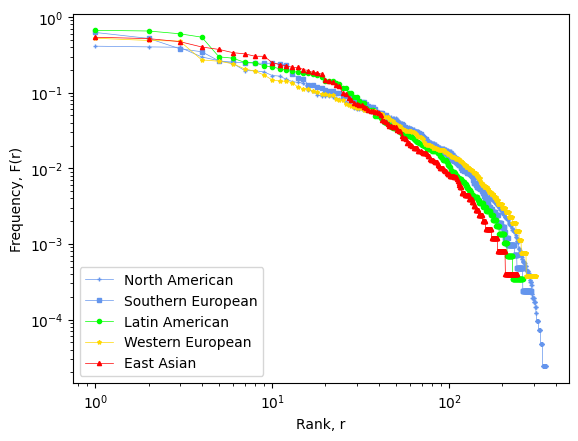

In [39]:
point_size = 3

plt.plot(range(1,NorthAmerican_RankOrder.shape[0]+1), NorthAmerican_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '+-', c='cornflowerblue', label='North American', linewidth=.5, markersize=point_size) 
plt.plot(range(1,SouthernEuropean_RankOrder.shape[0]+1), SouthernEuropean_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, 's-', c='cornflowerblue', label='Southern European', linewidth=.5, markersize=point_size)
plt.plot(range(1,LatinAmerican_RankOrder.shape[0]+1), LatinAmerican_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, 'o-', c='lime', label='Latin American', linewidth=.5, markersize=point_size)
plt.plot(range(1,WesternEuropean_RankOrder.shape[0]+1), WesternEuropean_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '*-', c='gold', label='Western European', linewidth=.5, markersize=point_size)
plt.plot(range(1,EastAsian_RankOrder.shape[0]+1), EastAsian_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '^-', c='red', label='East Asian', linewidth=.5, markersize=point_size)





plt.xlabel("Rank, r")
plt.ylabel("Frequency, F(r)")
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show()



## Getting the necessary data to export the food network to Cytoscape

In [238]:
ingredient_g = nx.from_pandas_edgelist(common_flavors_df.rename({'#':'weight'}, axis=1),source='ingredient_1', target = 'ingredient_2', edge_attr=True)


In [16]:
no_region_recipes_df = recipes_df.drop(['region'], axis=1)
unique_foods = pd.unique(no_region_recipes_df.values.ravel('K'))
unique_foods = [v for v in unique_foods if v == v]

prevalence = []
for i in unique_foods:
    prevalence.append(no_region_recipes_df[no_region_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/no_region_recipes_df.shape[0])

attribute_df = pd.DataFrame(
    {'ingredient': unique_foods,
     'prevalence': prevalence
    })

In [17]:
# data from FooDB
food_df = pd.read_csv('Food.csv')
food_df

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0,1,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1,2,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,155178.0,2012-04-20 09:39:54 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2,3,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,56367.0,2012-04-20 09:41:25 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3,4,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4,5,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,341911.0,2012-04-20 09:37:44 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1020,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989,1022,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990,1023,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [135]:
food_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at', 'legacy_id', 'food_group',
       'food_subgroup', 'food_type', 'created_at', 'updated_at', 'creator_id',
       'updater_id', 'export_to_afcdb', 'category', 'ncbi_taxonomy_id',
       'export_to_foodb', 'public_id'],
      dtype='object')

In [138]:
food_df['food_group'].unique()

array(['Herbs and Spices', 'Vegetables', 'Fruits', 'Nuts',
       'Cereals and cereal products', 'Pulses', 'Teas', 'Gourds',
       'Coffee and coffee products', 'Soy', 'Cocoa and cocoa products',
       'Beverages', 'Aquatic foods', 'Animal foods',
       'Milk and milk products', 'Eggs', 'Confectioneries',
       'Baking goods', 'Dishes', 'Snack foods', 'Baby foods',
       'Unclassified', 'Fats and oils', 'Herbs and spices', nan],
      dtype=object)

In [139]:
food_df.loc[food_df['food_group']=='Beverages']

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
267,268,Beer,NaN,Beer is an alcoholic beverage produced by the ...,NaN,Beer,268.jpg,image/jpeg,2746.0,2012-04-20 09:44:23 UTC,...,Type 2,2011-02-09 00:37:29 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,True,FOOD00268
275,277,Spirit,NaN,NaN,NaN,Spirit,277.jpg,image/jpeg,194630.0,2012-04-20 09:36:55 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,True,FOOD00276
276,278,Fortified wine,NaN,Fortified wine is wine with an added distilled...,NaN,Fortified wine,278.jpg,image/jpeg,40686.0,2012-04-20 09:33:36 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-12-11 19:32:37 UTC,NaN,2.0,False,specific,NaN,False,FOOD00277
277,279,Other alcoholic beverage,NaN,NaN,NaN,Alcoholic_beverage,279.jpg,image/jpeg,73939.0,2012-04-20 09:43:36 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,False,FOOD00278
611,626,Grape wine,NaN,Wine is an alcoholic beverage made from fermen...,NaN,Grape_wine,626.jpg,image/jpeg,24988.0,2012-04-20 09:29:56 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00612
612,627,Berry wine,NaN,NaN,NaN,NaN,627.jpg,image/jpeg,16358.0,2012-04-20 09:34:03 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00613
613,628,Other wine,NaN,NaN,NaN,NaN,628.jpg,image/jpeg,55077.0,2012-04-20 09:37:43 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-12-11 19:37:56 UTC,NaN,2.0,False,specific,NaN,False,FOOD00614
614,629,Apple cider,NaN,Apple cider (also called sweet cider or soft c...,NaN,Apple_cider,629.jpg,image/jpeg,60775.0,2012-04-20 09:30:39 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00615
615,630,Liquor,NaN,"A distilled beverage, spirit, liquor, or hard ...",NaN,Liquor,630.jpg,image/jpeg,175237.0,2012-04-20 09:31:58 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00616
621,639,Vodka,NaN,Vodka is a distilled beverage composed primari...,NaN,Vodka,639.jpg,image/jpeg,85287.0,2012-04-20 09:29:26 UTC,...,Type 2,2011-12-02 17:29:03 UTC,2019-05-14 18:05:28 UTC,2.0,2.0,False,specific,NaN,True,FOOD00622


In [741]:
attribute_df

,ingredient,prevalence
0,chicken,0.093702
1,cane_molasses,0.135492
2,butter,0.367163
3,olive_oil,0.174236
4,honey,0.043948
...,...,...
376,mate,0.000018
377,soybean_oil,0.000035
378,holy_basil,0.000035
379,mutton,0.000053


In [18]:
unique_foods = pd.unique(no_region_recipes_df.values.ravel('K'))
unique_foods = [v for v in unique_foods if v == v]

In [19]:
attribute_df = attribute_df.loc[attribute_df['ingredient'].isin(unique_foods)]
attribute_df

,ingredient,prevalence
0,chicken,0.093702
1,cane_molasses,0.135492
2,butter,0.367163
3,olive_oil,0.174236
4,honey,0.043948
...,...,...
376,mate,0.000018
377,soybean_oil,0.000035
378,holy_basil,0.000035
379,mutton,0.000053


In [20]:
food_group_df = food_df[['id', 'name','food_group']]
food_group_df

,id,name,food_group
0,1,Angelica,Herbs and Spices
1,2,Savoy cabbage,Vegetables
2,3,Silver linden,Herbs and Spices
3,4,Kiwi,Fruits
4,5,Allium,Vegetables
...,...,...,...
987,1020,Cape gooseberry,Fruits
988,1021,Herbal tea,Teas
989,1022,Fish oil,NaN
990,1023,Taco shell,NaN


In [172]:
food_group_df['name'] = food_group_df['name'].str.strip().str.lower().str.replace(" ", "_")
food_group_df

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/1330094091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_group_df['name'] = food_group_df['name'].str.strip().str.lower().str.replace(" ", "_")


,id,name,food_group
0,1,angelica,Herbs and Spices
1,2,savoy_cabbage,Vegetables
2,3,silver_linden,Herbs and Spices
3,4,kiwi,Fruits
4,5,allium,Vegetables
...,...,...,...
987,1020,cape_gooseberry,Fruits
988,1021,herbal_tea,Teas
989,1022,fish_oil,NaN
990,1023,taco_shell,NaN


In [213]:
attribute_df['id'] = 0
attribute_df

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/758373417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attribute_df['id'] = 0


,ingredient,prevalence,id
11,chicken,0.137722,0
12,cane_molasses,0.135492,0
13,butter,0.389005,0
14,olive_oil,0.174236,0
15,honey,0.043948,0
...,...,...,...
387,mate,0.000018,0
388,soybean_oil,0.000035,0
389,holy_basil,0.000035,0
390,mutton,0.000053,0


In [205]:
attribute_df.iloc[11]['ingredient'] + 's'

'lemon_juices'

In [203]:
food = food_group_df.loc[food_group_df['name']=='eggs']
food['id'].values[0]

633

In [219]:
for i in attribute_df.index:
    ingredient = attribute_df.loc[i]['ingredient']
    food = food_group_df.loc[food_group_df['name']==ingredient]
    if food.shape[0]>0:
        attribute_df.loc[i, 'id'] = food['id'].values[0]
        print('Perfect: matched', ingredient, 'to' , food['name'].values[0])
    else:
        food_plural = food_group_df.loc[food_group_df['name']==(ingredient + 's')]
        if food_plural.shape[0]>0:
            attribute_df.loc[i, 'id'] = food_plural['id'].values[0]
            print('Plural: matched', ingredient, 'to' , food_plural['name'].values[0])
        else:
            food_common = food_group_df.loc[food_group_df['name']==('common_' + ingredient)]
            if food_common.shape[0]>0:
                attribute_df.loc[i, 'id'] = food_common['id'].values[0]
                print('Common: matched', ingredient, 'to' , food_common['name'].values[0])

            if food.shape[0] + food_plural.shape[0] + food_common.shape[0] == 0:
                food = food_group_df.loc[food_group_df['name'].str.contains(ingredient, case=False)]
                food_ = food_group_df.loc[food_group_df['name'].str.contains(ingredient + '_', case=False)]
                if food_.shape[0]>0:
                    print(food_['id'].values)
                    attribute_df.loc[i, 'id'] = food_['id'].values[0]
                    print('matched', ingredient, 'to' , food_['name'].values[0])
                else:
                    if food.shape[0]>0:
                        print(food['id'].values)
                        attribute_df.loc[i, 'id'] = food['id'].values[0]
                        print('matched', ingredient, 'to' , food['name'].values[0])
                    else:
                        print('could not find ', ingredient)

Perfect: matched chicken to chicken
could not find  cane_molasses
Perfect: matched butter to butter
Perfect: matched olive_oil to olive_oil
Perfect: matched honey to honey
[173]
matched tomato to garden_tomato_(var.)
Perfect: matched wheat to wheat
Perfect: matched banana to banana
Perfect: matched cardamom to cardamom
[399 483]
matched lamb to lambsquarters
Perfect: matched coriander to coriander
could not find  lemon_juice
could not find  chicken_broth
Perfect: matched peanut_oil to peanut_oil
[456]
matched rose to rose_hip
Perfect: matched lemon to lemon
could not find  cilantro
Perfect: matched mustard to mustard
could not find  vegetable_oil
Perfect: matched cheese to cheese
Perfect: matched pepper to pepper
could not find  mace
[ 56 110 458 911]
matched orange to mandarin_orange_(clementine,_tangerine)
Perfect: matched olive to olive
could not find  orange_peel
Perfect: matched vinegar to vinegar
could not find  brandy
[182 705 706 707 708 890]
matched cocoa to cocoa_bean
Perfect

In [237]:
food_group_df.loc[food_group_df['name'].str.contains("pepper", case=False)]

,id,name,food_group
39,40,pepper,Vegetables
112,113,peppermint,Herbs and Spices
138,139,pepper_(spice),Herbs and Spices
230,231,pepper_(c._baccatum),Vegetables
231,232,pepper_(c._chinense),Vegetables
232,233,pepper_(capsicum),Vegetables
427,436,pepper_(c._frutescens),Vegetables
848,879,pepper_(c._pubescens),Vegetables
876,909,green_bell_pepper,Vegetables
877,910,yellow_bell_pepper,Vegetables


In [230]:
for i in attribute_df.loc[attribute_df['ingredient'].str.contains("oil", case=False)].index:
    attribute_df.loc[i, 'id'] = 894

In [236]:
attribute_df.loc[attribute_df['id']==0].sort_values('prevalence', ascending=False)[:30]

,ingredient,prevalence,id
78,black_pepper,0.172608,0
81,cayenne,0.140713,0
12,cane_molasses,0.135492,0
22,lemon_juice,0.089083,0
88,scallion,0.076852,0
42,pork,0.064215,0
23,chicken_broth,0.061135,0
237,yeast,0.060126,0
66,starch,0.045754,0
27,cilantro,0.039807,0


In [242]:
attribute_df.loc[78, 'id'] = 139 #black pepper
attribute_df.loc[81, 'id'] = 139 #cayenne
attribute_df.loc[12, 'id'] = 670 #sugar
attribute_df.loc[22, 'id'] = 54 #lemon

In [317]:
attribute_df.loc[attribute_df['ingredient'].str.contains("rose", case=False)]

,ingredient,prevalence,id
25,rose,0.034532,456
213,rosemary,0.033453,159


In [240]:
food_group_df.loc[food_group_df['name'].str.contains("sugar", case=False)]

,id,name,food_group
484,496,sugar_apple,Fruits
650,670,sugar,Baking goods
655,676,sugar_substitute,Baking goods


In [156]:
food_group_df.loc[food_group_df['name'].str.contains("basil", case=False)]

,name,food_group
118,sweet_basil,Herbs and Spices


In [157]:
first_try_df = attribute_df.merge(food_group_df, how='left', left_on='ingredient', right_on='name')


In [158]:
first_try_df[first_try_df['name'].isna()]

,ingredient,prevalence,name,food_group
1,cane_molasses,0.135492,NaN,NaN
5,tomato,0.176714,NaN,NaN
9,lamb,0.008354,NaN,NaN
11,lemon_juice,0.089083,NaN,NaN
12,chicken_broth,0.061135,NaN,NaN
...,...,...,...,...
374,beech,0.000018,NaN,NaN
375,laurel,0.000035,NaN,NaN
378,holy_basil,0.000035,NaN,NaN
379,mutton,0.000053,NaN,NaN


In [244]:
second_try_df = attribute_df.merge(food_group_df, how='left', on='id')
second_try_df

,ingredient,prevalence,id,name,food_group
0,chicken,0.137722,334,chicken,Animal foods
1,cane_molasses,0.135492,670,sugar,Baking goods
2,butter,0.389005,667,butter,Milk and milk products
3,olive_oil,0.174236,894,fats_and_oils,Fats and oils
4,honey,0.043948,643,honey,Confectioneries
...,...,...,...,...,...
376,mate,0.000018,948,mate,Herbs and Spices
377,soybean_oil,0.000035,894,fats_and_oils,Fats and oils
378,holy_basil,0.000035,0,NaN,NaN
379,mutton,0.000053,483,"sheep_(mutton,_lamb)",Animal foods


In [245]:
second_try_df[second_try_df['name'].isna()]

,ingredient,prevalence,id,name,food_group
12,chicken_broth,0.061135,0,NaN,NaN
16,cilantro,0.039807,0,NaN,NaN
21,mace,0.002035,0,NaN,NaN
24,orange_peel,0.010124,0,NaN,NaN
26,brandy,0.008248,0,NaN,NaN
...,...,...,...,...,...
371,muscat_grape,0.000018,0,NaN,NaN
372,roasted_pecan,0.000018,0,NaN,NaN
375,laurel,0.000035,0,NaN,NaN
378,holy_basil,0.000035,0,NaN,NaN


In [246]:
ingredient_g

In [275]:
second_try_df = second_try_df.fillna('N/A')

In [359]:
ingredient_g.add_nodes_from((n, dict(d)) for n, d in second_try_df.set_index('ingredient')[['prevalence', 'food_group']].iterrows())




In [360]:
ingredient_g.nodes['holy_basil']#['food_group']

{'prevalence': 3.539948316754575e-05, 'food_group': 'N/A'}

In [278]:
ingredient_g_fixed = nx.convert_node_labels_to_integers(ingredient_g, first_label=0, ordering='default', label_attribute='name')


In [279]:
nx.write_gexf(ingredient_g_fixed, "food_ingredients.gexf")

In [280]:
test_g = nx.read_gexf("food_ingredients.gexf")

In [284]:
test_g.nodes['0']

{'prevalence': 0.0004601932811780948,
 'food_group': 'N/A',
 'name': 'black_sesame_seed',
 'label': '0'}

In [301]:
nodes

<generator object <genexpr> at 0x28b593680>

In [337]:
ingredient_g.remove_node('wild_strawberry')

In [361]:
backbone_ingredient_g = pelote.multiscale_backbone(ingredient_g, alpha=.04, edge_weight_attr='weight')
subset = []

for node in backbone_ingredient_g.nodes(data=True):
    if len(node[1]) == 2:
        subset.append(node[0])

subgraph = backbone_ingredient_g.subgraph(subset)
subset = []         

for node in subgraph.nodes(data=True):
    print(node)
    if node[1]['prevalence'] > 0.01:
        subset.append(node[0])
subgraph = backbone_ingredient_g.subgraph(subset)

('cream_cheese', {'prevalence': 0.050249566356331196, 'food_group': 'Milk and milk products'})
('tuna', {'prevalence': 0.007840985521611384, 'food_group': 'Aquatic foods'})
('bartlett_pear', {'prevalence': 0.00040709405642677616, 'food_group': 'N/A'})
('tequila', {'prevalence': 0.0025133633048957486, 'food_group': 'N/A'})
('pimento', {'prevalence': 0.004778930227618677, 'food_group': 'N/A'})
('cinnamon', {'prevalence': 0.09917165209387943, 'food_group': 'Herbs and Spices'})
('caraway', {'prevalence': 0.004070940564267761, 'food_group': 'Herbs and Spices'})
('potato', {'prevalence': 0.07235654359446352, 'food_group': 'Vegetables'})
('seed', {'prevalence': 0.04511664129703706, 'food_group': 'Aquatic foods'})
('mango', {'prevalence': 0.006867499734503876, 'food_group': 'Fruits'})
('cherry_brandy', {'prevalence': 0.0006017912138482778, 'food_group': 'N/A'})
('port_wine', {'prevalence': 0.0008672873376048709, 'food_group': 'Beverages'})
('spearmint', {'prevalence': 8.849870791886439e-05, 'f

In [354]:
subgraph.nodes

NodeView(('yeast', 'cream_cheese', 'broccoli', 'mint', 'cucumber', 'peanut', 'soybean', 'zucchini', 'cinnamon', 'corn', 'meat', 'potato', 'seed', 'oregano', 'eel', 'lime_juice', 'mushroom', 'sesame_oil', 'strawberry', 'fenugreek', 'rice', 'cheddar_cheese', 'pork', 'olive', 'black_pepper', 'honey', 'grape_juice', 'radish', 'rose', 'coriander', 'cilantro', 'cheese', 'turmeric', 'walnut', 'ginger', 'starch', 'garlic', 'dill', 'oat', 'rum', 'cider', 'sesame_seed', 'vinegar', 'shallot', 'macaroni', 'lime', 'orange_juice', 'roasted_sesame_seed', 'raisin', 'soy_sauce', 'fruit', 'sherry', 'apple', 'almond', 'cane_molasses', 'milk', 'sage', 'bell_pepper', 'onion', 'chicken_broth', 'nut', 'lard', 'pork_sausage', 'cherry', 'basil', 'lettuce', 'coffee', 'pumpkin', 'nutmeg', 'celery', 'butter', 'bacon', 'wheat', 'lemon', 'lemon_peel', 'apricot', 'chicken', 'bread', 'raspberry', 'peanut_butter', 'tabasco_pepper', 'beef_broth', 'gin', 'smoke', 'banana', 'chive', 'cranberry', 'cocoa', 'cabbage', 'shri

In [343]:

subgraph = ingredient_g.subgraph(subset)

In [314]:
ingredient_g.nodes

NodeView(('black_sesame_seed', 'rose_wine', 'fennel', 'wild_berry', 'comte_cheese', 'grape', 'nira', 'raw_beef', 'corn_mint_oil', 'parsnip_fruit', 'soybean', 'vegetable_oil', 'bell_pepper', 'naranjilla', 'chervil', 'crayfish', 'corn_mint', 'cream_cheese', 'european_cranberry', 'thai_pepper', 'concord_grape', 'wild_strawberry', 'black_pepper', 'gruyere_cheese', 'prune', 'prunus', 'orange', 'satsuma_mandarin_peel', 'morus_bombycis_oil', 'wheaten_bread', 'corn_salad', 'kola_tea', 'citronella_grass', 'cooked_apple', 'anise', 'ledum_palustre_oil', 'beef_broth', 'wine', 'litchi', 'wild_marjoram', 'muscat_grape', 'vervain', 'lemongrass', 'mountain_papaya', 'azalea', 'carrot', 'kaffir_lime', 'kohlrabi', 'dried_fig', 'lily_oil', 'fatty_fish', 'katsuobushi', 'wheat_bread', 'smoked_fish', 'origanum_floribundum', 'capsicum_annuum', 'coriander_oil', 'fried_beef', 'long_pepper', 'apple_juice', 'fish_oil', 'raw_potato', 'guineafowl', 'imperatoria', 'swiss_cheese', 'banana', 'loquat', 'raw_lamb', 'roa

In [296]:
import pelote

In [356]:
nx.write_gexf(subgraph, "food_ingredients_backbone.gexf")

In [362]:
nx.write_gml(subgraph, "food_ingredients_backbone.gml")

## Getting average shared compounds of regional cuisines

In [99]:
co_compound_dict = {}
for index, row in common_flavors_df.iterrows():
    #print(row['ingredient_1'] + ',' + row['ingredient_2'])
    co_compound_dict[row['ingredient_1'] + ',' + row['ingredient_2']] = int(row['#'])
    co_compound_dict[row['ingredient_2'] + ',' + row['ingredient_1']] = int(row['#'])

In [726]:
#first, let's get the random recipes
def get_random_mean_shared_compounds(regional_prevalence_df, region_recipe_df):
    #n is number of ingredients
    n=0
    n = region_recipe_df.sample(n=1).notna().sum().sum()
    if n==1:
        return 0
    #print(n)
    random_recipe_ingredients = regional_prevalence_df.sample(n=n, weights=regional_prevalence_df['prevalence'])['ingredient'].values
    
    ingredient_combinations = []
    for comb in itertools.combinations(random_recipe_ingredients, 2):
        ingredient_combinations.append(comb[0] + ',' + comb[1])
    
    num_shared_compounds = 0
    num_pairs = 0
    for i in ingredient_combinations:
        common_compounds = co_compound_dict.get(i, 0)
        if common_compounds > 0:
            num_pairs +=1
            num_shared_compounds += common_compounds
    return(2/(n*(n-1))*num_shared_compounds)


In [129]:
NorthAmerican_recipes = recipes_df.loc[recipes_df['region']=='NorthAmerican'].drop('region', axis=1)
SouthernEuropean_recipes = recipes_df.loc[recipes_df['region']=='SouthernEuropean'].drop('region', axis=1)
LatinAmerican_recipes = recipes_df.loc[recipes_df['region']=='LatinAmerican'].drop('region', axis=1)
WesternEuropean_recipes = recipes_df.loc[recipes_df['region']=='WesternEuropean'].drop('region', axis=1)
EastAsian_recipes = recipes_df.loc[recipes_df['region']=='EastAsian'].drop('region', axis=1)

In [616]:
cuisines = ['NorthAmerican', 'SouthernEuropean', 'LatinAmerican', 'WesternEuropean', 'EastAsian']
random_mean_shared_compounds_NorthAmerican = []
random_mean_shared_compounds_SouthernEuropean = []
random_mean_shared_compounds_LatinAmerican = []
random_mean_shared_compounds_WesternEuropean = []
random_mean_shared_compounds_EastAsian = []
for j in range(10000):
    random_mean_shared_compounds_NorthAmerican.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes))
    random_mean_shared_compounds_SouthernEuropean.append(get_random_mean_shared_compounds(SouthernEuropean_RankOrder, SouthernEuropean_recipes))
    random_mean_shared_compounds_LatinAmerican.append(get_random_mean_shared_compounds(LatinAmerican_RankOrder, LatinAmerican_recipes))
    random_mean_shared_compounds_WesternEuropean.append(get_random_mean_shared_compounds(WesternEuropean_RankOrder, WesternEuropean_recipes))
    random_mean_shared_compounds_EastAsian.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes))

print(cuisines[0] + ':', np.mean(random_mean_shared_compounds_NorthAmerican))
print(cuisines[1] + ':', np.mean(random_mean_shared_compounds_SouthernEuropean))
print(cuisines[2] + ':', np.mean(random_mean_shared_compounds_LatinAmerican))
print(cuisines[3] + ':', np.mean(random_mean_shared_compounds_WesternEuropean))
print(cuisines[4] + ':', np.mean(random_mean_shared_compounds_EastAsian))

NorthAmerican: 10.419982713167908
SouthernEuropean: 10.97402037297055
LatinAmerican: 9.8286202949819
WesternEuropean: 10.199165067939267
EastAsian: 6.349637671344255


In [130]:
cuisines = ['NorthAmerican', 'SouthernEuropean', 'LatinAmerican', 'WesternEuropean', 'EastAsian']
random_mean_shared_compounds_NorthAmerican = []
random_mean_shared_compounds_SouthernEuropean = []
random_mean_shared_compounds_LatinAmerican = []
random_mean_shared_compounds_WesternEuropean = []
random_mean_shared_compounds_EastAsian = []
for j in range(10000):
    random_mean_shared_compounds_NorthAmerican.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes))
    random_mean_shared_compounds_SouthernEuropean.append(get_random_mean_shared_compounds(SouthernEuropean_RankOrder, SouthernEuropean_recipes))
    random_mean_shared_compounds_LatinAmerican.append(get_random_mean_shared_compounds(LatinAmerican_RankOrder, LatinAmerican_recipes))
    random_mean_shared_compounds_WesternEuropean.append(get_random_mean_shared_compounds(WesternEuropean_RankOrder, WesternEuropean_recipes))
    random_mean_shared_compounds_EastAsian.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes))

print(cuisines[0] + ':', np.mean(random_mean_shared_compounds_NorthAmerican))
print(cuisines[1] + ':', np.mean(random_mean_shared_compounds_SouthernEuropean))
print(cuisines[2] + ':', np.mean(random_mean_shared_compounds_LatinAmerican))
print(cuisines[3] + ':', np.mean(random_mean_shared_compounds_WesternEuropean))
print(cuisines[4] + ':', np.mean(random_mean_shared_compounds_EastAsian))

NorthAmerican: 10.038124882615682
SouthernEuropean: 9.800403462012289
LatinAmerican: 9.410525893438631
WesternEuropean: 9.7747715361065
EastAsian: 6.6042849206808505


In [151]:


random_mean_shared_compounds_NorthAmerican_mu = []
random_mean_shared_compounds_SouthernEuropean_mu = []
random_mean_shared_compounds_LatinAmerican_mu = []
random_mean_shared_compounds_WesternEuropean_mu = []
random_mean_shared_compounds_EastAsian_mu = []

for i in range(1000):
    if i % 50 == 0:
        print(i)
    random_mean_shared_compounds_NorthAmerican = []
#     random_mean_shared_compounds_SouthernEuropean = []
#     random_mean_shared_compounds_LatinAmerican = []
#     random_mean_shared_compounds_WesternEuropean = []
    random_mean_shared_compounds_EastAsian = []
    
    for j in range(10000):
        random_mean_shared_compounds_NorthAmerican.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes))
#         random_mean_shared_compounds_SouthernEuropean.append(get_mean_shared_compounds(10, SouthernEuropean_RankOrder))
#         random_mean_shared_compounds_LatinAmerican.append(get_mean_shared_compounds(10, LatinAmerican_RankOrder))
#         random_mean_shared_compounds_WesternEuropean.append(get_mean_shared_compounds(10, WesternEuropean_RankOrder))
        random_mean_shared_compounds_EastAsian.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes))
    
    random_mean_shared_compounds_NorthAmerican_mu.append(np.mean(random_mean_shared_compounds_NorthAmerican))
    random_mean_shared_compounds_EastAsian_mu.append(np.mean(random_mean_shared_compounds_EastAsian))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [147]:



random_mean_shared_compounds_cocktails_mu = []

for i in range(1000):
    if i % 50 == 0:
        print(i)
    random_mean_shared_compounds_cocktails = []
    for j in range(10000):
        random_mean_shared_compounds_cocktails.append(get_random_mean_shared_compounds(cocktail_RankOrder, new_df))
    random_mean_shared_compounds_cocktails_mu.append(np.mean(random_mean_shared_compounds_cocktails))


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [421]:
for index, row in recipes_df.loc[recipes_df['region']=='NorthAmerican'].drop('region', axis=1).iterrows():
    ingredients = row[row.notna()].values
    ingredient_pairs = [x+','+y for x in ingredients for y in ingredients if x!=y]
    print(ingredient_pairs)
    break

['cane_molasses,cherry', 'cane_molasses,pineapple', 'cane_molasses,mustard', 'cane_molasses,ham', 'cherry,cane_molasses', 'cherry,pineapple', 'cherry,mustard', 'cherry,ham', 'pineapple,cane_molasses', 'pineapple,cherry', 'pineapple,mustard', 'pineapple,ham', 'mustard,cane_molasses', 'mustard,cherry', 'mustard,pineapple', 'mustard,ham', 'ham,cane_molasses', 'ham,cherry', 'ham,pineapple', 'ham,mustard']


In [125]:

def get_mean_shared_compounds_real(region):
    mean_shared_compounds_region = []
    for index, row in recipes_df.loc[recipes_df['region']==region].drop('region', axis=1).iterrows():
        ingredients = row[row.notna()].values
        #print(ingredients)
        n = len(ingredients)
        if n >= 2:
            ingredient_pairs = [comb[0]+','+comb[1] for comb in itertools.combinations(ingredients, 2)]
            num_shared_compounds = 0
            num_pairs = 0
            for i in ingredient_pairs:
                common_compounds = co_compound_dict.get(i, 0)
                num_shared_compounds += common_compounds
                if common_compounds > 0:
                    num_pairs += 1
            mean_shared_compounds = (2/(n*(n-1)))*num_shared_compounds
            mean_shared_compounds_region.append(mean_shared_compounds)

        
    return(mean_shared_compounds_region)

In [131]:
mean_shared_compounds_NorthAmerican = get_mean_shared_compounds_real('NorthAmerican')
mean_shared_compounds_SouthernEuropean = get_mean_shared_compounds_real('SouthernEuropean')
mean_shared_compounds_LatinAmerican = get_mean_shared_compounds_real('LatinAmerican')
mean_shared_compounds_WesternEuropean = get_mean_shared_compounds_real('WesternEuropean')
mean_shared_compounds_EastAsian = get_mean_shared_compounds_real('EastAsian')

print(cuisines[0] + ':', np.mean(mean_shared_compounds_NorthAmerican))
print(cuisines[1] + ':', np.mean(mean_shared_compounds_SouthernEuropean))
print(cuisines[2] + ':', np.mean(mean_shared_compounds_LatinAmerican))
print(cuisines[3] + ':', np.mean(mean_shared_compounds_WesternEuropean))
print(cuisines[4] + ':', np.mean(mean_shared_compounds_EastAsian))

NorthAmerican: 11.619954644694179
SouthernEuropean: 9.644014952234823
LatinAmerican: 9.824198688365383
WesternEuropean: 10.642246621812905
EastAsian: 6.211237677516636


In [132]:
np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican)

1.5818297620784971

In [133]:
np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean)

0.8674750857064044

In [134]:
np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican)

0.413672794926752

In [135]:
np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean)

-0.1563885097774662

In [136]:
np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian)

-0.39304724316421424

## Figure 3C anf 3D

(C,D) To test the validity of the food pairing hypothesis, we construct 10,000 random recipes and calculate ΔNs . We find that ingredient pairs in North American cuisines tend to share more compounds while East Asian cuisines tend to share fewer compounds than expected in a random recipe dataset.

<>:8: DeprecationWarning: invalid escape sequence '\D'
<>:8: DeprecationWarning: invalid escape sequence '\D'
/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_63795/3396210839.py:8: DeprecationWarning: invalid escape sequence '\D'
  plt.ylabel("$ \Delta N_{r}$")


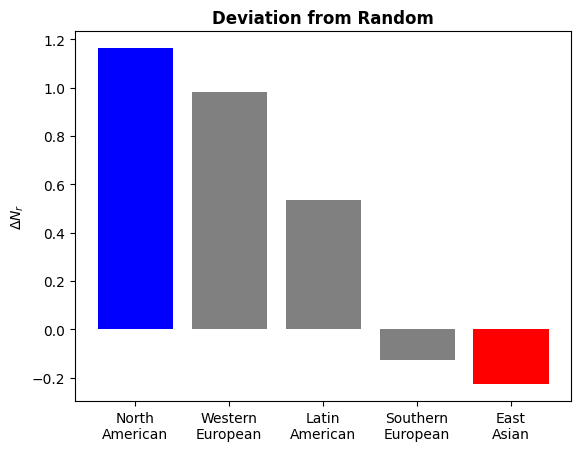

In [781]:
plt.bar(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian'],
          [np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican),
           np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean),
           np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican),
           np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean),
           np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian)
           ], width=0.8, color=['blue', 'gray', 'gray', 'gray', 'red'])
plt.ylabel("$ \Delta N_{r}$")
plt.title('Deviation from Random', fontweight ="bold")
plt.show()
#plt.plot(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian'], [0, 0, 0, 0, 0], "k")

In [139]:
z_score_NorthAmerican = (np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican))/(np.std(random_mean_shared_compounds_NorthAmerican)/100)
z_score_NorthAmerican

21.28225078856016

In [140]:
z_score_WesternEuropean = (np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean))/(np.std(random_mean_shared_compounds_WesternEuropean)/100)
z_score_WesternEuropean

11.596865051987288

In [141]:
z_score_LatinAmerican = (np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican))/(np.std(random_mean_shared_compounds_LatinAmerican)/100)
z_score_LatinAmerican

6.681152450353941

In [142]:
z_score_SouthernEuropean = (np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean))/(np.std(random_mean_shared_compounds_SouthernEuropean)/100)
z_score_SouthernEuropean

-2.1459161294540094

In [143]:
z_score_EastAsian = (np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian))/(np.std(random_mean_shared_compounds_EastAsian)/100)
z_score_EastAsian

-7.251517308338426

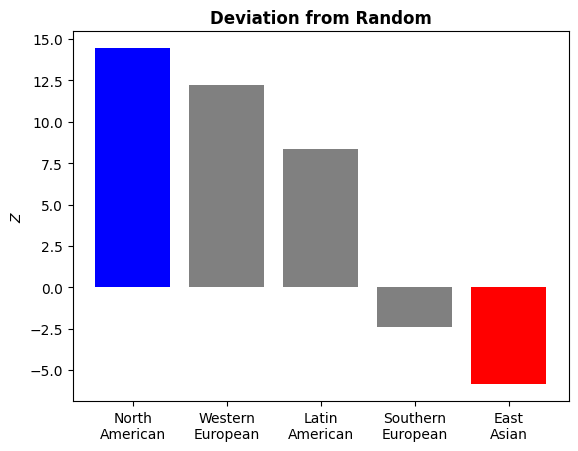

In [739]:
plt.bar(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian'],
          [z_score_NorthAmerican,
           z_score_WesternEuropean,
           z_score_LatinAmerican,
           z_score_SouthernEuropean,
           z_score_EastAsian
           ], width=0.8, color=['blue', 'gray', 'gray', 'gray', 'red'])

plt.ylabel("$ Z $")
plt.title('Deviation from Random', fontweight ="bold")
plt.show()

## Figure 3E and 3F

(E,F) The distributions P(Ns ) for 10,000 randomized recipe datasets compared with the real values for East Asian and North American cuisine. Both cuisines exhibit significant p-values, as estimated using a z-test.

Text(0.5, 1.0, 'North American')

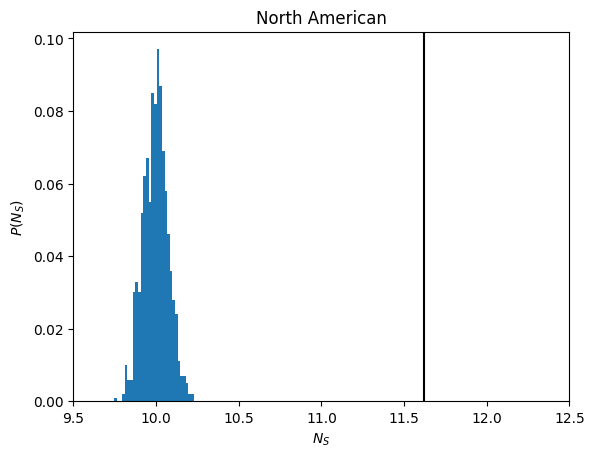

In [160]:
weights = np.ones_like(random_mean_shared_compounds_NorthAmerican_mu)/float(len(random_mean_shared_compounds_NorthAmerican_mu))
plt.hist(random_mean_shared_compounds_NorthAmerican_mu, bins=30, weights=weights)
plt.axvline(x=np.mean(mean_shared_compounds_NorthAmerican), color='black')
plt.xlim([9.5,12.5])
plt.xlabel('$N_S$')
plt.ylabel('$P(N_S)$')
plt.title('North American')

Text(0.5, 1.0, 'East Asain')

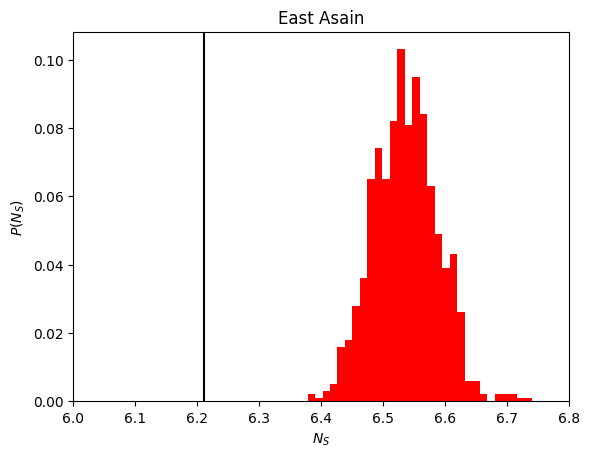

In [161]:
weights = np.ones_like(random_mean_shared_compounds_EastAsian_mu)/float(len(random_mean_shared_compounds_EastAsian_mu))

plt.hist(random_mean_shared_compounds_EastAsian_mu, bins=30, weights = weights, color='r')
plt.axvline(x=np.mean(mean_shared_compounds_EastAsian), color='black')

plt.xlim([6,6.8])
plt.xlabel('$N_S$')
plt.ylabel('$P(N_S)$')
plt.title('East Asain')

Text(0.5, 1.0, 'Cocktails')

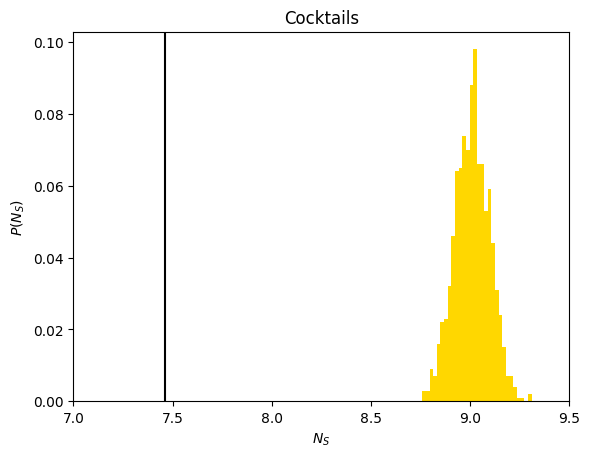

In [162]:
weights = np.ones_like(random_mean_shared_compounds_cocktails_mu)/float(len(random_mean_shared_compounds_cocktails_mu))
plt.hist(random_mean_shared_compounds_cocktails_mu, bins=30, weights=weights, color='gold')
plt.axvline(x=np.mean(get_mean_shared_compounds_real_cocktail()), color='black')
plt.xlim([7,9.5])
plt.xlabel('$N_S$')
plt.ylabel('$P(N_S)$')
plt.title('Cocktails')

In [ ]:
#getting compound contribution

In [168]:
#average number of common compounds - level of contribution
overall_mean_shared_compounds_NorthAmerican = np.mean(mean_shared_compounds_NorthAmerican)
NorthAmerican_frequency = []
for i in unique_NorthAmerican:
    NorthAmerican_frequency.append(NorthAmerican_recipes[NorthAmerican_recipes.map(lambda x: x == i).any(axis=1)].shape[0])
NorthAmerican_RankOrder['frequency'] = NorthAmerican_frequency

In [169]:
NorthAmerican_RankOrder

,ingredient,prevalence,frequency
0,cane_molasses,0.165591,6876
1,scallion,0.055221,2293
2,butter,0.411521,17088
3,tomato,0.140208,5822
4,olive_oil,0.133730,5553
...,...,...,...
349,ouzo,0.000024,1
350,mung_bean,0.000024,1
351,mutton,0.000048,2
352,chinese_cabbage,0.000024,1


In [658]:
NorthAmerican_recipes

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
6807,cane_molasses,cherry,pineapple,mustard,ham,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6808,scallion,green_bell_pepper,ham,onion,thyme,bell_pepper,bay,smoked_sausage,garlic,parsley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6809,butter,corn_grit,black_pepper,milk_fat,garlic,cheddar_cheese,egg,milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6810,cane_molasses,thyme,onion,lime_juice,fish,cayenne,ginger,black_pepper,mango,garlic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6811,tomato,butter,green_bell_pepper,wheat,onion,cayenne,scallion,garlic,rice,shrimp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48326,provolone_cheese,wheat,yeast,chive,blue_cheese,pear,walnut,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48327,cane_molasses,vinegar,pepper,lemon_juice,onion,liver,cream_cheese,tamarind,pork_sausage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48328,tomato,fennel,garlic,oregano,pineapple,mozzarella_cheese,pork_sausage,bread,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48329,vanilla,pear,ginger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# getting ingredient contributions
def get_real_ingredient_average_contribution(ingredient, frequency_df, regional_recipe_df):
    ingredient_recipe_df = regional_recipe_df[regional_recipe_df.map(lambda x: x == ingredient).any(axis=1)]
    recipe_contribution_sum = 0
    for index, recipe in ingredient_recipe_df.iterrows():
        recipe_ingredients = recipe[recipe.notna()].values
        if len(recipe_ingredients) > 1:
            ingredient_pairs = [ingredient+','+complimentary_ingredient for complimentary_ingredient in recipe_ingredients if ingredient!=complimentary_ingredient]
            compound_overlap = 0
            for pair in ingredient_pairs:
                compound_overlap += co_compound_dict.get(pair, 0)
            individual_recipe_contribution = (2/(len(recipe_ingredients)*(len(recipe_ingredients)-1)))*compound_overlap
            recipe_contribution_sum += individual_recipe_contribution
    return(recipe_contribution_sum/regional_recipe_df.shape[0])
            
                
        

In [108]:
def get_random_ingredient_average_contribution(ingredient, frequency_df, regional_recipe_df):
    numerator = 0
    denominator = 0
    ingredient_frequency = frequency_df.loc[frequency_df['ingredient']==ingredient]['frequency'].values[0]
    regional_average = regional_recipe_df.count(axis=1).mean()
    for index, row in frequency_df.iterrows():
        if row['ingredient'] != ingredient:
            complimentary_ingredient = row['ingredient']
            complimentary_ingredient_frequency = row['frequency']
            denominator += complimentary_ingredient_frequency
            numerator += complimentary_ingredient_frequency*co_compound_dict.get(ingredient+','+complimentary_ingredient, 0)
    #print(numerator/denominator)
    #print(2*ingredient_frequency)
    #print(regional_recipe_df.shape[0]*regional_average)
    return((2*ingredient_frequency)/(regional_recipe_df.shape[0]*regional_average))*(numerator/denominator)
            

In [717]:
get_real_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes)

2.032709599731241

In [718]:
get_random_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes)

1.5035359322560096

In [719]:
get_real_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes) - get_random_ingredient_average_contribution('milk', NorthAmerican_RankOrder, NorthAmerican_recipes)



0.5291736674752316

In [170]:
contributions = []
for i in NorthAmerican_RankOrder['ingredient']:
    contribution = get_real_ingredient_average_contribution(i, NorthAmerican_RankOrder, NorthAmerican_recipes) - get_random_ingredient_average_contribution(i, NorthAmerican_RankOrder, NorthAmerican_recipes)
    contributions.append(contribution)


In [171]:
NorthAmerican_RankOrder['contribution'] = contributions
NorthAmerican_RankOrder.sort_values('contribution', ascending=False)

,ingredient,prevalence,frequency,contribution
77,milk,0.264811,10996,0.529174
2,butter,0.411521,17088,0.511310
26,cocoa,0.104470,4338,0.376588
45,vanilla,0.194610,8081,0.238822
50,cream,0.195646,8124,0.153994
...,...,...,...,...
125,chicken,0.089996,3737,-0.049830
14,onion,0.296479,12311,-0.052380
141,beef,0.075595,3139,-0.054363
118,white_wine,0.031090,1291,-0.055624


In [172]:
EastAsian_frequency = []
for i in unique_EastAsian:
    EastAsian_frequency.append(EastAsian_recipes[EastAsian_recipes.map(lambda x: x == i).any(axis=1)].shape[0])
EastAsian_RankOrder['frequency'] = EastAsian_frequency
EastAsian_RankOrder

,ingredient,prevalence,frequency
0,beef_broth,0.055334,139
1,sesame_oil,0.373010,937
2,vinegar,0.216162,543
3,beef,0.182723,459
4,garlic,0.518312,1302
...,...,...,...
237,cashew,0.000796,2
238,lentil,0.000398,1
239,veal,0.000796,2
240,malt,0.000398,1


In [173]:
contributions = []
for i in EastAsian_RankOrder['ingredient']:
    contribution = get_real_ingredient_average_contribution(i, EastAsian_RankOrder, EastAsian_recipes) - get_random_ingredient_average_contribution(i, EastAsian_RankOrder, EastAsian_recipes)
    contributions.append(contribution)

In [174]:
EastAsian_RankOrder['contribution'] = contributions

In [175]:
EastAsian_RankOrder.sort_values('contribution', ascending=False)

,ingredient,prevalence,frequency,contribution
27,rice,0.337978,849,0.293853
144,red_bean,0.012739,32,0.151871
146,milk,0.020303,51,0.055241
124,green_tea,0.005971,15,0.041095
31,butter,0.026672,67,0.040597
...,...,...,...,...
20,chicken,0.085987,216,-0.066196
53,cayenne,0.401274,1008,-0.068644
8,pork,0.097532,245,-0.098719
46,ginger,0.325637,818,-0.103179


In [176]:
attribute_df

,ingredient,prevalence
0,chicken,0.093702
1,cane_molasses,0.135492
2,butter,0.367163
3,olive_oil,0.174236
4,honey,0.043948
...,...,...
376,mate,0.000018
377,soybean_oil,0.000035
378,holy_basil,0.000035
379,mutton,0.000053


In [177]:
def get_relative_prevalence(Rank_Order_df):
    intermediate_df = Rank_Order_df.merge(attribute_df, on= 'ingredient')
    intermediate_df['relative_prevalence'] = intermediate_df['prevalence_x'] - intermediate_df['prevalence_y']
    return(Rank_Order_df.merge(intermediate_df[['ingredient', 'relative_prevalence']], on='ingredient'))

In [178]:
EastAsian_RankOrder = get_relative_prevalence(EastAsian_RankOrder)
EastAsian_RankOrder

,ingredient,prevalence,frequency,contribution,relative_prevalence
0,beef_broth,0.055334,139,-5.746113e-04,0.040555
1,sesame_oil,0.373010,937,-4.905988e-03,0.349274
2,vinegar,0.216162,543,-4.854544e-03,0.079963
3,beef,0.182723,459,-2.497808e-01,0.097375
4,garlic,0.518312,1302,-3.022574e-02,0.219310
...,...,...,...,...,...
237,cashew,0.000796,2,-2.825814e-04,-0.002726
238,lentil,0.000398,1,4.322857e-07,-0.004027
239,veal,0.000796,2,-5.598768e-04,-0.002708
240,malt,0.000398,1,-3.105237e-04,-0.000257


In [179]:
NorthAmerican_RankOrder = get_relative_prevalence(NorthAmerican_RankOrder)
NorthAmerican_RankOrder

,ingredient,prevalence,frequency,contribution,relative_prevalence
0,cane_molasses,0.165591,6876,1.891907e-03,0.030099
1,scallion,0.055221,2293,-1.094122e-03,-0.021631
2,butter,0.411521,17088,5.113099e-01,0.044358
3,tomato,0.140208,5822,-1.679238e-01,-0.035179
4,olive_oil,0.133730,5553,-1.347902e-03,-0.040506
...,...,...,...,...,...
349,ouzo,0.000024,1,7.646629e-07,-0.000135
350,mung_bean,0.000024,1,-1.857210e-05,-0.000312
351,mutton,0.000048,2,-1.423953e-04,-0.000005
352,chinese_cabbage,0.000024,1,-1.627030e-06,-0.002826


In [877]:
NorthAmerican_RankOrder.sort_values('relative_prevalence', ascending=False)[:50]

,ingredient,prevalence,frequency,relative_prevalence,contribution
2,butter,0.411521,17088,0.044358,0.511310
77,milk,0.264811,10996,0.036573,0.529174
45,vanilla,0.194610,8081,0.034870,0.238822
30,egg,0.403092,16738,0.032265,0.150682
12,wheat,0.398131,16532,0.030295,0.000504
0,cane_molasses,0.165591,6876,0.030099,0.001892
26,cocoa,0.104470,4338,0.019493,0.376588
50,cream,0.195646,8124,0.015958,0.153994
127,cream_cheese,0.061820,2567,0.011570,0.153900
99,pecan,0.049971,2075,0.011456,0.037590


## Figure 3I and 3J

(I,J) The contribution and frequency of use for each ingredient in North American and East Asian cuisine. The size of the circles represents the relative prevalence. North American and East Asian cuisine shows the opposite trends.

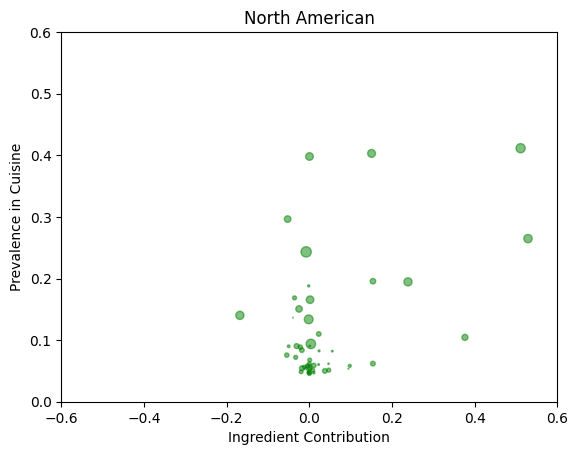

In [768]:
plt.scatter(NorthAmerican_RankOrder.sort_values('prevalence', ascending=False)[:50]['contribution'], NorthAmerican_RankOrder.sort_values('prevalence', ascending=False)[:50]['prevalence'], s=1000*np.absolute(NorthAmerican_RankOrder.sort_values('prevalence', ascending=False)[:50]['relative_prevalence']), c='green', alpha=0.5)
plt.xlim([-.6,.6])
plt.ylim([0,.6])
plt.xlabel("Ingredient Contribution")
plt.ylabel("Prevalence in Cuisine")
plt.title("North American")
plt.show()

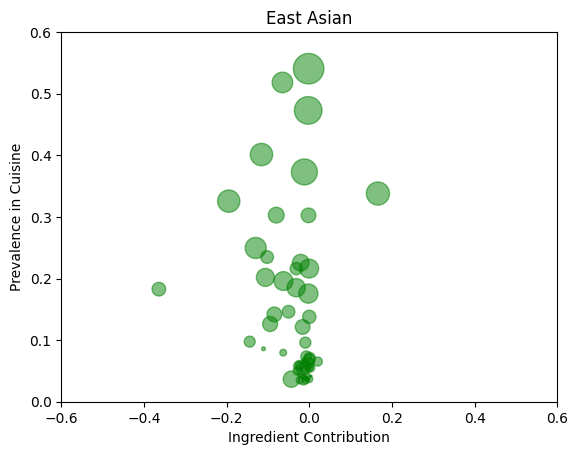

In [770]:
plt.scatter(EastAsian_RankOrder.sort_values('prevalence', ascending=False)[:50]['contribution'], EastAsian_RankOrder.sort_values('prevalence', ascending=False)[:50]['prevalence'], s=1000*np.absolute(EastAsian_RankOrder.sort_values('prevalence', ascending=False)[:50]['relative_prevalence']), c='green', alpha=0.5)
plt.xlim([-.6,.6])
plt.ylim([0,.6])
plt.xlabel("Ingredient Contribution")
plt.ylabel("Prevalence in Cuisine")
plt.title("East Asian")
plt.show()

In [180]:
#removing 30 ingredients and checking the z scores
def get_mean_shared_compounds_real(region, not_included_ingredients=[]):
    mean_shared_compounds_region = []
    for index, row in recipes_df.loc[recipes_df['region']==region].drop('region', axis=1).iterrows():
        ingredients = row[row.notna()].values
        ingredients = set(ingredients) - set(not_included_ingredients)
        ingredients = list(ingredients)
        #print(ingredients)
        n = len(ingredients)
        if n >= 2:
            ingredient_pairs = [comb[0]+','+comb[1] for comb in itertools.combinations(ingredients, 2)]
            num_shared_compounds = 0
            num_pairs = 0
            for i in ingredient_pairs:
                common_compounds = co_compound_dict.get(i, 0)
                num_shared_compounds += common_compounds
                if common_compounds > 0:
                    num_pairs += 1
            mean_shared_compounds = (2/(n*(n-1)))*num_shared_compounds
            mean_shared_compounds_region.append(mean_shared_compounds)
        
    return(mean_shared_compounds_region)

In [181]:
def get_random_mean_shared_compounds(regional_prevalence_df, region_recipe_df, not_included_ingredients=[]):
    #n is number of ingredients
    n_1 = region_recipe_df.sample(n=1).notna().sum().sum()
    
    #print(n)
    random_recipe_ingredients = regional_prevalence_df.sample(n=n_1, weights=regional_prevalence_df['prevalence'])['ingredient'].values
    random_recipe_ingredients = set(random_recipe_ingredients) - set(not_included_ingredients)
    random_recipe_ingredients = list(random_recipe_ingredients)
    n = len(random_recipe_ingredients)
    while n<=1:
        n_1+=1
        random_recipe_ingredients = regional_prevalence_df.sample(n=n_1, weights=regional_prevalence_df['prevalence'])['ingredient'].values
        random_recipe_ingredients = set(random_recipe_ingredients) - set(not_included_ingredients)
        random_recipe_ingredients = list(random_recipe_ingredients)
        n = len(random_recipe_ingredients)
    ingredient_combinations = []
    for comb in itertools.combinations(random_recipe_ingredients, 2):
        ingredient_combinations.append(comb[0] + ',' + comb[1])
    
    num_shared_compounds = 0
    num_pairs = 0
    for i in ingredient_combinations:
        common_compounds = co_compound_dict.get(i, 0)
        if common_compounds > 0:
            num_pairs +=1
            num_shared_compounds += common_compounds
    return(2/(n*(n-1))*num_shared_compounds)

In [182]:
mean_shared_compounds_w_removal = []
NorthAmerican_RankOrder_sorted = NorthAmerican_RankOrder.sort_values('contribution', ascending=False)
for i in range(0, 31):
    removed_ingredients = NorthAmerican_RankOrder_sorted[:i]['ingredient'].values
    #print(removed_ingredients)
    mean_shared_compounds_w_removal.append(np.mean(get_mean_shared_compounds_real('NorthAmerican',removed_ingredients)))


In [183]:
random_mean_shared_compounds_w_removal = []
random_mean_shared_compounds_w_removal_sd = []

for i in range(0, 31):
    print(i)
    removed_ingredients = NorthAmerican_RankOrder_sorted[:i]['ingredient'].values
    random_recipe_overlap_w_removal = []
    for j in range(10000):
        random_recipe_overlap_w_removal.append(get_random_mean_shared_compounds(NorthAmerican_RankOrder, NorthAmerican_recipes, removed_ingredients))
    #print(removed_ingredients)
    random_mean_shared_compounds_w_removal.append(np.mean(random_recipe_overlap_w_removal))
    random_mean_shared_compounds_w_removal_sd.append(np.std(random_recipe_overlap_w_removal))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [184]:
z_score_removed_NorthAmerican = (np.array(mean_shared_compounds_w_removal) - np.array(random_mean_shared_compounds_w_removal))/(np.array(random_mean_shared_compounds_w_removal)/100)
z_score_removed_NorthAmerican

array([ 1.73468207e+01,  1.43484599e+01,  9.94793522e+00,  8.25526858e+00,
        6.72467323e+00,  8.45164918e+00,  5.99051017e+00,  3.21710250e+00,
        6.35903143e+00,  2.55237839e+00,  2.86232393e+00,  1.84459359e+00,
        3.06872080e+00,  8.39186141e-01,  1.25939648e-02,  5.44800896e-01,
       -8.89778175e-01, -1.86029950e-01, -6.46082228e-01, -7.22814681e-01,
       -7.13052020e-01, -1.86470272e+00, -9.79177576e-01, -3.51025260e-01,
       -1.06623402e+00, -3.00601222e+00, -3.17073497e+00, -3.77796983e+00,
       -3.21302772e+00, -3.41668619e+00, -2.35752582e+00])

## Figure 3K and 3L

If we remove the highly contributing ingredients sequentially (from the largest contribution in North American cuisine and from the smallest contribution in East Asian cuisine), the shared compounds effect quickly vanishes when we removed five (East Asian) to fifteen (North American) ingredients.

Text(0.5, 1.0, 'North American')

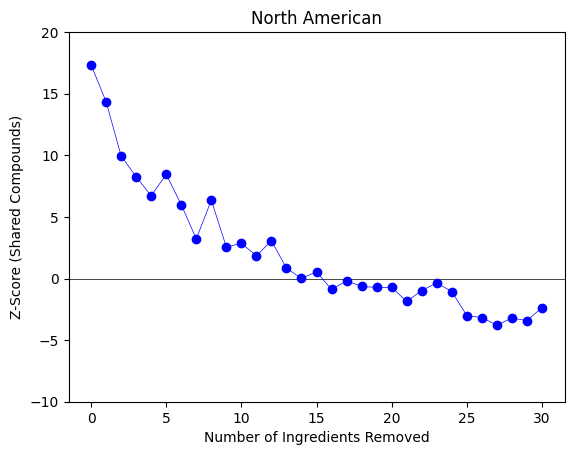

In [185]:
plt.axhline(y=0, color='black', linestyle='-', linewidth=.5)
plt.plot(range(0,31), z_score_removed_NorthAmerican, 'o-', c='blue', label='North American', linewidth=.5) 
plt.ylim([-10,20])
plt.xlabel("Number of Ingredients Removed")
plt.ylabel("Z-Score (Shared Compounds)")
plt.title("North American")

In [186]:
EastAsian_mean_shared_compounds_w_removal = []
EastAsian_RankOrder_sorted = EastAsian_RankOrder.sort_values('contribution', ascending=True)
for i in range(0, 31):
    removed_ingredients = EastAsian_RankOrder_sorted[:i]['ingredient'].values
    #print(removed_ingredients)
    EastAsian_mean_shared_compounds_w_removal.append(np.mean(get_mean_shared_compounds_real('EastAsian',removed_ingredients)))


In [187]:
get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes, removed_ingredients)

5.733333333333333

In [188]:
EastAsian_random_mean_shared_compounds_w_removal = []
EastAsian_random_mean_shared_compounds_w_removal_sd = []

for i in range(0, 31):
    removed_ingredients = EastAsian_RankOrder_sorted[:i]['ingredient'].values
    random_recipe_overlap_w_removal = []
    for j in range(10000):
        random_recipe_overlap_w_removal.append(get_random_mean_shared_compounds(EastAsian_RankOrder, EastAsian_recipes, removed_ingredients))
    #print(removed_ingredients)
    EastAsian_random_mean_shared_compounds_w_removal.append(np.mean(random_recipe_overlap_w_removal))
    EastAsian_random_mean_shared_compounds_w_removal_sd.append(np.std(random_recipe_overlap_w_removal))


In [189]:
z_score_removed_EastAsian = (np.array(EastAsian_mean_shared_compounds_w_removal) - np.array(EastAsian_random_mean_shared_compounds_w_removal))/(np.array(EastAsian_random_mean_shared_compounds_w_removal_sd)/100)
z_score_removed_EastAsian

array([-7.04689292, -2.05361388, -1.31416924, -3.25834115, -0.9788854 ,
        1.29758962,  0.58460021,  1.76352338, -1.1624928 , -0.42039418,
       -1.61415586, -0.2716197 ,  0.88493031, -1.98246989, -1.82161547,
        1.29091624,  0.86870858,  3.13159608,  1.84451614,  0.53837147,
        1.34960913,  2.34013473,  1.69548579,  0.17211898,  4.01242409,
        2.92635443,  0.28905589,  0.59717755,  2.04931181,  1.91530597,
        0.34393417])

Text(0.5, 1.0, 'East Asian')

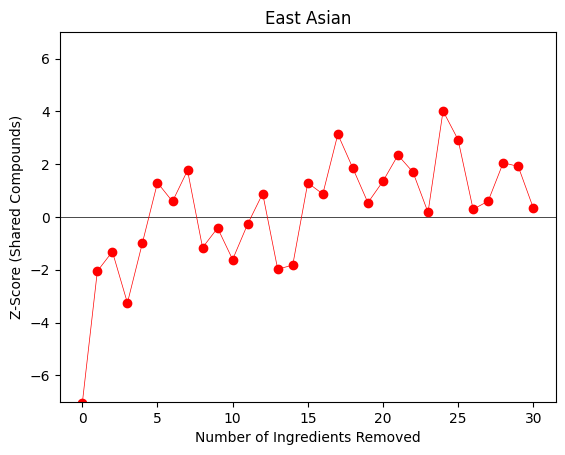

In [192]:

plt.axhline(y=0, color='black', linestyle='-', linewidth=.5)
plt.plot(range(0,31), z_score_removed_EastAsian, 'o-', c='red', label='East Asian', linewidth=.5) 
plt.ylim([-7,7])
plt.xlabel("Number of Ingredients Removed")
plt.ylabel("Z-Score (Shared Compounds)")
plt.title("East Asian")

In [878]:
NorthAmerican_RankOrder.sort_values('relative_prevalence', ascending=False)[:6]

,ingredient,prevalence,frequency,relative_prevalence,contribution
2,butter,0.411521,17088,0.044358,0.511310
77,milk,0.264811,10996,0.036573,0.529174
45,vanilla,0.194610,8081,0.034870,0.238822
30,egg,0.403092,16738,0.032265,0.150682
12,wheat,0.398131,16532,0.030295,0.000504
0,cane_molasses,0.165591,6876,0.030099,0.001892


## Figure 4A and 4B

(A,B) Flavor pyramids for North American and East Asian cuisines. Each flavor pyramid shows the six most authentic ingredients (i.e. those with the largest $p_i^c$), ingredient pairs (largest $p_{ij}^c$) and ingredient triplets (largest $p_{ijk}^c$). The size of the nodes reflects the abundance $p_i^c$ of the ingredient in the recipes of the particular cuisine. Each color represents the category of the ingredient (see Fig. 2 for the color) and link thickness indicates the number of shared compounds.

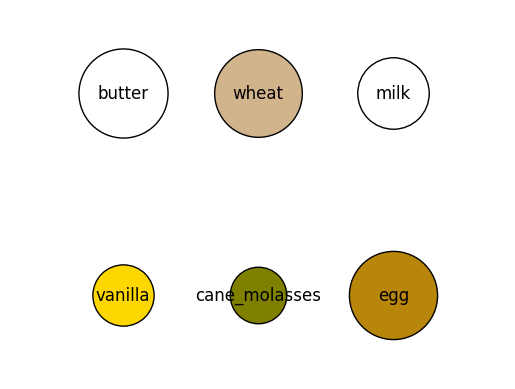

In [899]:
G=nx.grid_2d_graph(2,3)  #4x4 grid


plt.subplot(221)
nx.draw(ingredient_g.subgraph('butter'),node_color='white', edgecolors='black', with_labels=True, node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*10000)

plt.subplot(222)
nx.draw(ingredient_g.subgraph('milk'),node_color='white', edgecolors='black', with_labels=True, node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='milk']['prevalence'].values*10000)

plt.subplot(223)
nx.draw(ingredient_g.subgraph('vanilla'),node_color='gold',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000,with_labels=True)

plt.subplot(224)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('egg'),node_color='darkgoldenrod',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*10000,with_labels=True)

plt.subplot(211)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('wheat'),node_color='tan',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000,with_labels=True)

plt.subplot(212)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('cane_molasses'),node_color='olive',edgecolors='black', node_size = NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='cane_molasses']['prevalence'].values*10000,with_labels=True)



plt.show()

In [942]:
ingredient_g.subgraph(['butter', 'vanilla']).edges[['butter', 'vanilla']].get('weight')

33

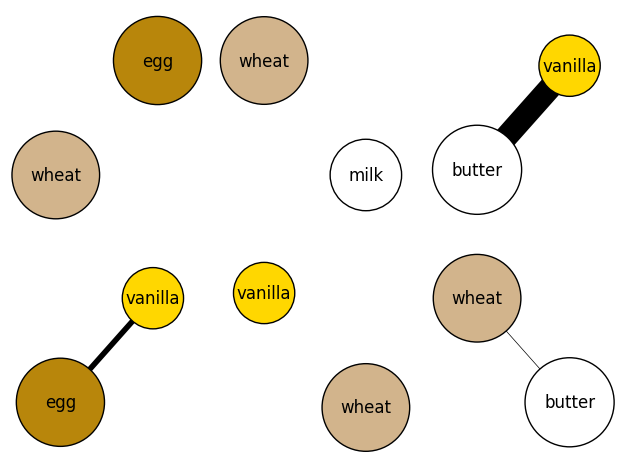

In [948]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat


nx.draw(ingredient_g.subgraph(['egg', 'wheat']),node_color=['darkgoldenrod', 'tan'], edgecolors='black', with_labels=True, node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000], ax=ax[0])

# plt.subplot(222)
nx.draw(ingredient_g.subgraph(['milk', 'wheat']),node_color=['white', 'tan'], edgecolors='black', with_labels=True, node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='milk']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000], ax=ax[1])

# plt.subplot(223)
nx.draw(ingredient_g.subgraph(['vanilla', 'butter']),node_color=['gold', 'white'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*10000],with_labels=True, ax=ax[2], width=ingredient_g.subgraph(['vanilla', 'butter']).edges[['vanilla', 'butter']].get('weight')/2)

# plt.subplot(224)
nx.draw(ingredient_g.subgraph(['egg', 'vanilla']),node_color=['gold', 'darkgoldenrod'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*10000],with_labels=True, ax=ax[3], width=ingredient_g.subgraph(['egg', 'vanilla']).edges[['egg', 'vanilla']].get('weight')/2)

# plt.subplot(225)
nx.draw(ingredient_g.subgraph(['wheat', 'vanilla']),node_color=['gold', 'tan'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000],with_labels=True, ax=ax[4])

# plt.subplot(226)
nx.draw(ingredient_g.subgraph(['butter', 'wheat']),node_color=['white', 'tan'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*10000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*10000],with_labels=True, ax=ax[5], width=ingredient_g.subgraph(['butter', 'wheat']).edges[['butter', 'wheat']].get('weight')/2)

for a in ax:
    a.margins(0.45)
fig.tight_layout()

plt.show()

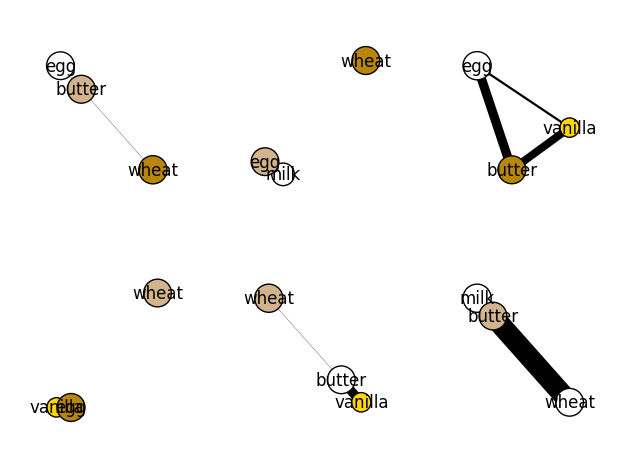

In [965]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat


nx.draw(ingredient_g.subgraph(['egg', 'wheat', 'butter']),
        node_color=['tan', 'white', 'darkgoldenrod'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000],
        width=[ingredient_g.subgraph(['wheat', 'butter']).edges[['wheat', 'butter']].get('weight')/5, ingredient_g.subgraph(['wheat', 'butter']).edges[['wheat', 'butter']].get('weight')/5],
        ax=ax[0])

# plt.subplot(222)
nx.draw(ingredient_g.subgraph(['milk', 'wheat', 'egg']),node_color=['white', 'tan', 'darkgoldenrod'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='milk']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000], 
        ax=ax[1])

# plt.subplot(223)
nx.draw(ingredient_g.subgraph(['vanilla', 'butter', 'egg']),
        node_color=['gold', 'white', 'darkgoldenrod'],edgecolors='black', node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000],
        with_labels=True, 
        ax=ax[2], 
        width=[ingredient_g.subgraph(['egg', 'butter']).edges[['egg', 'butter']].get('weight')/5,ingredient_g.subgraph(['egg', 'vanilla']).edges[['egg', 'vanilla']].get('weight')/5,ingredient_g.subgraph(['vanilla', 'butter']).edges[['vanilla', 'butter']].get('weight')/5] )

# plt.subplot(224)
nx.draw(ingredient_g.subgraph(['egg', 'vanilla', 'wheat']),node_color=['gold', 'darkgoldenrod', 'tan'],
        edgecolors='black', 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='egg']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000],
        with_labels=True, 
        ax=ax[3], 
        width=[ingredient_g.subgraph(['egg', 'vanilla']).edges[['egg', 'vanilla']].get('weight')/5])

# plt.subplot(225)
nx.draw(ingredient_g.subgraph(['wheat', 'vanilla', 'butter']),
        node_color=['gold', 'white', 'tan'],edgecolors='black', 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='vanilla']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000],
        with_labels=True, 
        ax=ax[4],
        width=[ingredient_g.subgraph(['butter', 'vanilla']).edges[['butter', 'vanilla']].get('weight')/5, ingredient_g.subgraph(['butter', 'wheat']).edges[['butter', 'wheat']].get('weight')/5])

# plt.subplot(226)
nx.draw(ingredient_g.subgraph(['butter', 'wheat', 'milk']),
        node_color=['white', 'tan', 'white'],
        edgecolors='black', 
        node_size = [NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='butter']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000, NorthAmerican_RankOrder[NorthAmerican_RankOrder['ingredient']=='wheat']['prevalence'].values*1000],with_labels=True, 
        ax=ax[5], 
        width=[ingredient_g.subgraph(['butter', 'wheat']).edges[['butter', 'wheat']].get('weight')/5, ingredient_g.subgraph(['butter', 'milk']).edges[['butter', 'milk']].get('weight')/5])

for a in ax:
    a.margins(0.45)
fig.tight_layout()

plt.show()

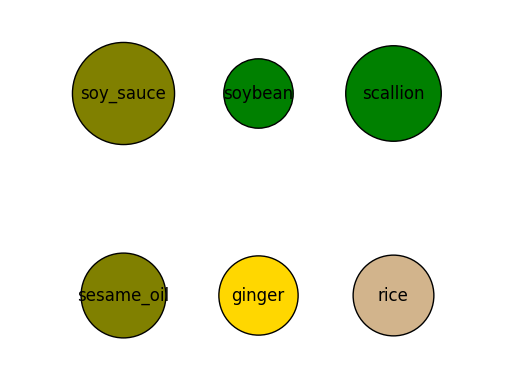

In [969]:
plt.subplot(221)
nx.draw(ingredient_g.subgraph('soy_sauce'),
        node_color='olive', 
        edgecolors='black', 
        with_labels=True, 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000)

plt.subplot(222)
nx.draw(ingredient_g.subgraph('scallion'),
        node_color='g', edgecolors='black',
        with_labels=True, 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*10000)

plt.subplot(223)
nx.draw(ingredient_g.subgraph('sesame_oil'),
        node_color='olive',edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*10000,
        with_labels=True)

plt.subplot(224)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('rice'),
        node_color='tan',
        edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='rice']['prevalence'].values*10000,
        with_labels=True)

plt.subplot(211)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('soybean'),
        node_color='g',edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soybean']['prevalence'].values*10000,
        with_labels=True)

plt.subplot(212)
H=G.to_directed()
nx.draw(ingredient_g.subgraph('ginger'),
        node_color='gold',
        edgecolors='black', 
        node_size = EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='ginger']['prevalence'].values*10000,
        with_labels=True)



plt.show()

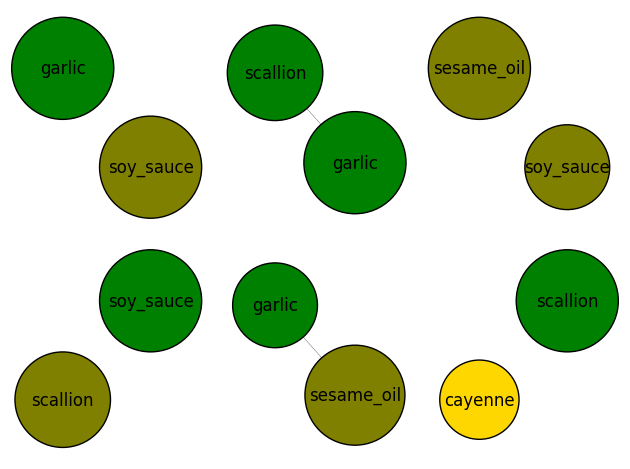

In [996]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat

nx.draw(ingredient_g.subgraph(['soy_sauce', 'garlic']),
        node_color=['olive' , 'g'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        ax=ax[0])


nx.draw(ingredient_g.subgraph(['scallion', 'garlic']),
        node_color=['g', 'g'], edgecolors='black',
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        ax=ax[1],
        width=[ingredient_g.subgraph(['scallion', 'garlic']).edges[['scallion', 'garlic']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['sesame_oil', 'soy_sauce']),
        node_color='olive',edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[2])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['soy_sauce', 'scallion']),
        node_color=['olive', 'g'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[3])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['garlic', 'sesame_oil']),
        node_color=['olive', 'g'],edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[4],
        width=[ingredient_g.subgraph(['sesame_oil', 'garlic']).edges[['sesame_oil', 'garlic']].get('weight')/5])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['scallion', 'cayenne']),
        node_color=['gold', 'g'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='ginger']['prevalence'].values*10000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*10000],
        with_labels=True,
        ax=ax[5])


for a in ax:
    a.margins(0.6)
fig.tight_layout()

plt.show()

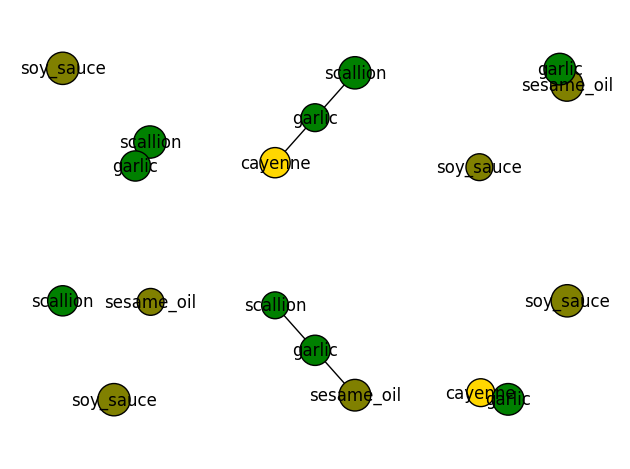

In [1001]:
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat

nx.draw(ingredient_g.subgraph(['soy_sauce', 'garlic', 'scallion']),
        node_color=['g','olive','g'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000],
        ax=ax[0])


nx.draw(ingredient_g.subgraph(['scallion', 'garlic', 'cayenne']),
        node_color=['gold', 'g', 'g'], edgecolors='black',
        with_labels=True, 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='cayenne']['prevalence'].values*1000],
        ax=ax[1])


nx.draw(ingredient_g.subgraph(['sesame_oil', 'soy_sauce', 'garlic']),
        node_color=['olive', 'olive', 'g'],edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000,EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[2])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['soy_sauce', 'scallion', 'sesame_oil']),
        node_color=['g', 'olive', 'olive'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[3])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['garlic', 'sesame_oil', 'scallion']),
        node_color=['olive', 'g', 'g'],edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='sesame_oil']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='scallion']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[4])


H=G.to_directed()
nx.draw(ingredient_g.subgraph(['soy_sauce', 'cayenne', 'garlic']),
        node_color=['gold', 'olive', 'g'],
        edgecolors='black', 
        node_size = [EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='cayenne']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='soy_sauce']['prevalence'].values*1000, EastAsian_RankOrder[EastAsian_RankOrder['ingredient']=='garlic']['prevalence'].values*1000],
        with_labels=True,
        ax=ax[5])


for a in ax:
    a.margins(0.6)
fig.tight_layout()

plt.show()

## Trying to extract cocktails

In [21]:
recipes_df

,region,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,African,chicken,cinnamon,soy_sauce,onion,ginger,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African,cane_molasses,ginger,cumin,garlic,tamarind,bread,coriander,vinegar,onion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,African,butter,pepper,onion,cardamom,cayenne,ginger,cottage_cheese,garlic,brassica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,African,olive_oil,pepper,wheat,beef,onion,cardamom,cumin,garlic,rice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,African,honey,wheat,yeast,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56493,WesternEuropean,cane_molasses,butter,wheat,whiskey,vanilla,egg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56494,WesternEuropean,lemon_juice,wheat,onion,parsley,celery,nutmeg,vegetable_oil,chicken,egg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56495,WesternEuropean,butter,wheat,onion,beef,bacon,black_pepper,parsley,beer,garlic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56496,WesternEuropean,lemon,onion,black_pepper,white_wine,celery,carrot,mussel,bay,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
food_df

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
0,1,Angelica,Angelica keiskei,Angelica is a genus of about 60 species of tal...,NaN,Angelica,1.jpg,image/jpeg,111325.0,2012-04-20 09:29:57 UTC,...,Type 1,2011-02-09 00:37:14 UTC,2019-05-14 18:04:13 UTC,NaN,2.0,False,specific,357850.0,True,FOOD00001
1,2,Savoy cabbage,Brassica oleracea var. sabauda,Savoy cabbage (Brassica oleracea convar. capit...,NaN,Savoy cabbage,2.jpg,image/jpeg,155178.0,2012-04-20 09:39:54 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,1216010.0,True,FOOD00002
2,3,Silver linden,Tilia argentea,Tilia tomentosa (Silver Lime in the UK and Sil...,845789.0,Tilia tomentosa,3.jpg,image/jpeg,56367.0,2012-04-20 09:41:25 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-17 16:19:45 UTC,NaN,NaN,False,specific,NaN,True,FOOD00003
3,4,Kiwi,Actinidia chinensis,"The kiwifruit, often shortened to kiwi in many...",506775.0,Kiwifruit,4.jpg,image/jpeg,110661.0,2012-04-20 09:32:21 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,3625.0,True,FOOD00004
4,5,Allium,Allium,Allium haematochiton is a species of wild onio...,42634.0,Allium haematochiton,5.jpg,image/jpeg,341911.0,2012-04-20 09:37:44 UTC,...,Type 1,2011-02-09 00:37:15 UTC,2019-05-14 18:04:13 UTC,NaN,NaN,False,specific,4678.0,True,FOOD00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1020,Cape gooseberry,Physalis peruviana,"Physalis peruviana, a plant species of the gen...",NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-01-24 17:05:37 UTC,2020-01-24 17:05:37 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00988
988,1021,Herbal tea,NaN,Herbal teas are the beverages made from the in...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 20:55:17 UTC,2020-03-12 20:55:17 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00989
989,1022,Fish oil,NaN,Fish oil is oil derived from the tissues of oi...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 1,2020-03-12 21:00:02 UTC,2020-03-12 21:00:02 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00990
990,1023,Taco shell,NaN,The hard-shell or crispy taco is a tradition t...,NaN,NaN,NaN,NaN,NaN,NaN,...,Type 2,2020-03-12 21:01:58 UTC,2020-03-12 21:01:58 UTC,NaN,NaN,False,NaN,NaN,True,FOOD00991


In [9]:
food_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at', 'legacy_id', 'food_group',
       'food_subgroup', 'food_type', 'created_at', 'updated_at', 'creator_id',
       'updater_id', 'export_to_afcdb', 'category', 'ncbi_taxonomy_id',
       'export_to_foodb', 'public_id'],
      dtype='object')

In [10]:
food_df['food_group'].value_counts()

food_group
Aquatic foods                  169
Fruits                         157
Vegetables                     147
Herbs and Spices               126
Dishes                          51
Cereals and cereal products     50
Beverages                       38
Milk and milk products          36
Baking goods                    33
Animal foods                    29
Confectioneries                 29
Pulses                          28
Nuts                            27
Gourds                          19
Soy                              9
Cocoa and cocoa products         8
Snack foods                      8
Fats and oils                    8
Teas                             7
Coffee and coffee products       5
Eggs                             2
Baby foods                       1
Unclassified                     1
Herbs and spices                 1
Name: count, dtype: int64

In [12]:
food_df.loc[food_df['food_group']=='Beverages']

,id,name,name_scientific,description,itis_id,wikipedia_id,picture_file_name,picture_content_type,picture_file_size,picture_updated_at,...,food_type,created_at,updated_at,creator_id,updater_id,export_to_afcdb,category,ncbi_taxonomy_id,export_to_foodb,public_id
267,268,Beer,NaN,Beer is an alcoholic beverage produced by the ...,NaN,Beer,268.jpg,image/jpeg,2746.0,2012-04-20 09:44:23 UTC,...,Type 2,2011-02-09 00:37:29 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,True,FOOD00268
275,277,Spirit,NaN,NaN,NaN,Spirit,277.jpg,image/jpeg,194630.0,2012-04-20 09:36:55 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,True,FOOD00276
276,278,Fortified wine,NaN,Fortified wine is wine with an added distilled...,NaN,Fortified wine,278.jpg,image/jpeg,40686.0,2012-04-20 09:33:36 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-12-11 19:32:37 UTC,NaN,2.0,False,specific,NaN,False,FOOD00277
277,279,Other alcoholic beverage,NaN,NaN,NaN,Alcoholic_beverage,279.jpg,image/jpeg,73939.0,2012-04-20 09:43:36 UTC,...,Type 2,2011-02-09 00:37:30 UTC,2019-05-14 18:04:21 UTC,NaN,2.0,False,specific,NaN,False,FOOD00278
611,626,Grape wine,NaN,Wine is an alcoholic beverage made from fermen...,NaN,Grape_wine,626.jpg,image/jpeg,24988.0,2012-04-20 09:29:56 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00612
612,627,Berry wine,NaN,NaN,NaN,NaN,627.jpg,image/jpeg,16358.0,2012-04-20 09:34:03 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00613
613,628,Other wine,NaN,NaN,NaN,NaN,628.jpg,image/jpeg,55077.0,2012-04-20 09:37:43 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-12-11 19:37:56 UTC,NaN,2.0,False,specific,NaN,False,FOOD00614
614,629,Apple cider,NaN,Apple cider (also called sweet cider or soft c...,NaN,Apple_cider,629.jpg,image/jpeg,60775.0,2012-04-20 09:30:39 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00615
615,630,Liquor,NaN,"A distilled beverage, spirit, liquor, or hard ...",NaN,Liquor,630.jpg,image/jpeg,175237.0,2012-04-20 09:31:58 UTC,...,Type 2,2011-02-09 00:37:52 UTC,2019-05-14 18:05:28 UTC,NaN,2.0,False,specific,NaN,True,FOOD00616
621,639,Vodka,NaN,Vodka is a distilled beverage composed primari...,NaN,Vodka,639.jpg,image/jpeg,85287.0,2012-04-20 09:29:26 UTC,...,Type 2,2011-12-02 17:29:03 UTC,2019-05-14 18:05:28 UTC,2.0,2.0,False,specific,NaN,True,FOOD00622


In [ ]:
cocktail = []
for i in unique_LatinAmerican:
    LatinAmerican_prevalence.append(LatinAmerican_recipes_df[LatinAmerican_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/LatinAmerican_recipes_df.shape[0])

In [35]:
#recipes_df[recipes_df.map(lambda x: x == 'rum').any(axis=1)].shape[0]/recipes_df.shape[0]

print(recipes_df[recipes_df.map(lambda x: x == 'rum').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'whiskey').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'bourbon_whiskey').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'vodka').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'tequila').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'gin').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'sake').any(axis=1)].shape[0])
#print(recipes_df[recipes_df.map(lambda x: x == 'liquor').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'brandy').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'cognac').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'beer').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'white_wine').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'red_wine').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'wine').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'blackberry_brandy').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'apple_brandy').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'cherry_brandy').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'grape_brandy').any(axis=1)].shape[0])
print(recipes_df[recipes_df.map(lambda x: x == 'cabernet_sauvignon_wine').any(axis=1)].shape[0])

602
148
156
0
142
68
624
395
66
303
2166
1393
877
4
37
34
8
17


In [36]:
recipes_df[recipes_df.map(lambda x: x == 'rum').any(axis=1)]

,region,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
281,African,butter,wheat,rum,vanilla,brandy,pecan,date,egg,cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,EastAsian,cane_molasses,cream,rum,vegetable_oil,rice,banana,walnut,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2911,EasternEuropean,apricot,rum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2934,EasternEuropean,butter,coffee,wheat,mustard,onion,rum,vanilla,parsley,cocoa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3103,EasternEuropean,butter,cocoa,rum,apricot,egg,milk,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56273,WesternEuropean,butter,lemon,rum,almond,white_wine,fruit,wheat,egg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56339,WesternEuropean,butter,cocoa,wheat,rum,pistachio,egg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56371,WesternEuropean,butter,lemon_juice,wheat,rum,starch,egg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56382,WesternEuropean,butter,cocoa,wheat,rum,almond,egg,milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
unique_foods = pd.unique(recipes_df.values.ravel('K'))
unique_foods = [v for v in unique_foods if v == v]

In [24]:
unique_foods

['African',
 'EastAsian',
 'EasternEuropean',
 'LatinAmerican',
 'MiddleEastern',
 'NorthAmerican',
 'NorthernEuropean',
 'SouthAsian',
 'SoutheastAsian',
 'SouthernEuropean',
 'WesternEuropean',
 'chicken',
 'cane_molasses',
 'butter',
 'olive_oil',
 'honey',
 'tomato',
 'wheat',
 'banana',
 'cardamom',
 'lamb',
 'coriander',
 'lemon_juice',
 'chicken_broth',
 'peanut_oil',
 'rose',
 'lemon',
 'cilantro',
 'mustard',
 'vegetable_oil',
 'cheese',
 'pepper',
 'mace',
 'orange',
 'olive',
 'orange_peel',
 'vinegar',
 'brandy',
 'cocoa',
 'pistachio',
 'chive',
 'quince',
 'pork',
 'turmeric',
 'cinnamon',
 'milk_fat',
 'beef_broth',
 'sesame_oil',
 'beef',
 'garlic',
 'sweet_potato',
 'radish',
 'nut',
 'carrot',
 'fish',
 'roasted_sesame_seed',
 'eel',
 'sake',
 'onion',
 'corn',
 'vegetable',
 'pea',
 'grape_juice',
 'rice',
 'turnip',
 'date',
 'starch',
 'mushroom',
 'bean',
 'sherry',
 'melon',
 'katsuobushi',
 'peanut',
 'scallop',
 'ginger',
 'celery',
 'ham',
 'cabbage',
 'black_

In [23]:
hotaling_cocktails_df = pd.read_csv('hotaling_cocktails - Cocktails.csv')
hotaling_cocktails_df

,Cocktail Name,Bartender,Bar/Company,Location,Ingredients,Garnish,Glassware,Preparation,Notes
0,Flor de Amaras,Kelly McCarthy,NaN,Boston,"1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...",Marigold Petals,NaN,*Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...,NaN
1,The Happy Place,Elizabeth Montana,Forgery & Verso,San Francisco,"2 oz Junipero Gin, .75 oz House-made Cranberry...","Dehydrated Lemon Wheel, Sprig of Rosemary",NaN,*House-made Cranberry syrup: \n-- 2 cups Fresh...,Junipero Gin 20th Anniversary Signature Cocktail
2,Bon Voyage Pisco Punch,Jon Morales,NaN,San Francisco,"1500 ml BarSol Selecto Italia Pisco, 750 ml Le...",NaN,Punch Bowl,*Pineapple Gomme: \nMix equal parts (1.5 cups)...,NaN
3,Still Life of a Pineapple,Daniel Braganca,Backbar,Somerville,"1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...",NaN,NaN,*Pineapple Syrup:\n<em>Equal parts pineapple b...,NaN
4,The Bittered Valley,Nik Virrey,NaN,Seattle,"1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...",NaN,NaN,"1st glass ingredients:\nLuxardo Maraschino, Ac...",NaN
...,...,...,...,...,...,...,...,...,...
682,The Negroni Bianco,NaN,NaN,NaN,"1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fu...",NaN,NaN,NaN,NaN
683,Match Grip Julep,Jarred Weigand,Death & Co.,New York,"1.5 oz H by HINE, .5 oz Jamaican Rum, 1 tsp Ca...",NaN,NaN,NaN,NaN
684,The Dry Cruise,Jacyara de Oliveira,"Rob Roy, The Hideout",Seattle,"1 oz Luxardo Bitter Bianco, 1 oz Lustau Oloros...","Edible Flower, Straw",NaN,NaN,NaN
685,Red Hook,Patrick Halloran,Henrietta Red,Nashville,"2 oz Rye Whiskey, 5 oz Punt e Mes, .5 oz Luxar...",NaN,NaN,NaN,NaN


In [152]:
import re

# Sample DataFrame
data = {'column_with_lists': [['apple1', 'orange2', 'banana3'], ['apple4', 'orange5', 'banana6']]}
df = pd.DataFrame(data)

# Function to remove numbers from each string in a list
def remove_numbers_from_list(string_list):
    return [re.sub(r'\d+', '', string) for string in string_list]

# Apply the function to the column containing lists of strings
df['column_with_lists'] = df['column_with_lists'].apply(remove_numbers_from_list)

df

,column_with_lists
0,"[apple, orange, banana]"
1,"[apple, orange, banana]"


In [149]:
import re

# Function to remove numbers from each string in a list
def remove_numbers_from_list(string_list):
    return [re.sub(r'\d+', '', string) for string in string_list]

# Apply the function to the column containing lists of strings
hotaling_cocktails_df['Ingredients'] = hotaling_cocktails_df['Ingredients'].apply(remove_numbers_from_list)


In [151]:
hotaling_cocktails_df

,Cocktail Name,Bartender,Bar/Company,Location,Ingredients,Garnish,Glassware,Preparation,Notes
0,Flor de Amaras,Kelly McCarthy,NaN,Boston,"[, ., , , o, z, , M, e, z, c, a, l, ,, , , ...",Marigold Petals,NaN,*Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...,NaN
1,The Happy Place,Elizabeth Montana,Forgery & Verso,San Francisco,"[, , o, z, , J, u, n, i, p, e, r, o, , G, i...","Dehydrated Lemon Wheel, Sprig of Rosemary",NaN,*House-made Cranberry syrup: \n-- 2 cups Fresh...,Junipero Gin 20th Anniversary Signature Cocktail
2,Bon Voyage Pisco Punch,Jon Morales,NaN,San Francisco,"[, , , , , m, l, , B, a, r, S, o, l, , S, e...",NaN,Punch Bowl,*Pineapple Gomme: \nMix equal parts (1.5 cups)...,NaN
3,Still Life of a Pineapple,Daniel Braganca,Backbar,Somerville,"[, ., , , o, z, , B, a, r, S, o, l, , P, r,...",NaN,NaN,*Pineapple Syrup:\n<em>Equal parts pineapple b...,NaN
4,The Bittered Valley,Nik Virrey,NaN,Seattle,"[, ., , , , o, z, , L, u, x, a, r, d, o, , ...",NaN,NaN,"1st glass ingredients:\nLuxardo Maraschino, Ac...",NaN
...,...,...,...,...,...,...,...,...,...
682,The Negroni Bianco,NaN,NaN,NaN,"[, ., , , o, z, , L, u, x, a, r, d, o, , B,...",NaN,NaN,NaN,NaN
683,Match Grip Julep,Jarred Weigand,Death & Co.,New York,"[, ., , , o, z, , H, , b, y, , H, I, N, E,...",NaN,NaN,NaN,NaN
684,The Dry Cruise,Jacyara de Oliveira,"Rob Roy, The Hideout",Seattle,"[, , o, z, , L, u, x, a, r, d, o, , B, i, t...","Edible Flower, Straw",NaN,NaN,NaN
685,Red Hook,Patrick Halloran,Henrietta Red,Nashville,"[, , o, z, , R, y, e, , W, h, i, s, k, e, y...",NaN,NaN,NaN,NaN


In [38]:
pd.read_parquet('hugging_face_cocktails.parquet')

,title,ingredients,directions,misc,source,ner
0,151 Swizzle,[1.5 oz. 151-Proof Demerara Rum [Lemon Hart or...,[],[],Beachbum Berry Remixed,"[pernod, rum]"
1,20th Century,"[The 21st Century, 2 oz. Siete Leguas Blanco T...","[shake on ice and strain into coupe , The Best...",[],Jim Meehan,"[cocchi americano, pernod, tequila]"
2,20th Century,"[1.5 oz. Plymouth Gin, 3\/4 oz. Mari Brizard W...",[shake on ice and strain],[],PDT,"[lillet, gin]"
3,Abbey Cocktail,[],"[Shake liquid ingredients with ice., Strain in...",[Suggested glassware is Cocktail Glass],The Ultimate Bar Book,[]
4,Absinthe Drip,[1 1/2 ounces Pernod (or other absinthe substi...,[Pour Pernod into a pousse-caf or sour glass....,[The Absinthe Drip was made famous by Toulouse...,The Ultimate Bar Book,"[pernod, absinthe]"
...,...,...,...,...,...,...
870,Yellow Bird,"[ A Caribbean favorite., 1 ounce dark rum, 1 o...","[Shake liquid ingredients with ice., Strain in...",[Suggested glassware is Cocktail Glass],The Ultimate Bar Book,"[galliano, triple sec, rum, cointreau]"
871,Yellow Fever,"[1 1/2 ounces vodka, 1/2 ounce Galliano, 1/2 o...","[Shake ingredients with ice., Strain into a ch...",[Suggested glassware is Cocktail Glass],The Ultimate Bar Book,"[vodka, galliano]"
872,Yellow Parrot Cocktail,"[3/4 ounce yellow Chartreuse, 3/4 ounce Pernod...","[Shake ingredients with ice., Strain into a ch...",[Suggested glassware is Cocktail Glass],The Ultimate Bar Book,"[brandy, pernod, chartreuse]"
873,[The Spirit of the] Algonquin,"[ 2oz. 90 Proof Rye, .75oz. Lemon Juice, .75oz...",[shake on ice and strain],[Suggested glassware is Cocktail Glass],PDT,[]


In [123]:
common_flavors_df.loc[common_flavors_df['ingredient_1']=='salt']

,ingredient_1,ingredient_2,#


In [48]:
content_df = pd.read_csv('Content.csv')

/var/folders/dv/9r1wf3bn7d3d9_sc9zbs77km0000gn/T/ipykernel_94983/1478114385.py:1: DtypeWarning: Columns (4,5,6,7,8,9,13,14,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  content_df = pd.read_csv('Content.csv')


In [49]:
content_df.columns

Index(['id', 'source_id', 'source_type', 'food_id', 'orig_food_id',
       'orig_food_common_name', 'orig_food_scientific_name', 'orig_food_part',
       'orig_source_id', 'orig_source_name', 'orig_content', 'orig_min',
       'orig_max', 'orig_unit', 'orig_citation', 'citation', 'citation_type',
       'creator_id', 'updater_id', 'created_at', 'updated_at', 'orig_method',
       'orig_unit_expression', 'standard_content', 'preparation_type',
       'export'],
      dtype='object')

In [50]:
content_df[['orig_food_common_name', 'orig_content']]

,orig_food_common_name,orig_content
0,Kiwi,1955.00
1,Onion,1853.95
2,Onion,4150.00
3,Chives,3900.00
4,Cashew,2500.00
...,...,...
5145527,Endogenous compounds from human (HMDB),NaN
5145528,Endogenous compounds from human (HMDB),NaN
5145529,Endogenous compounds from human (HMDB),NaN
5145530,Endogenous compounds from human (HMDB),NaN


In [61]:
hotaling_cocktails_df['Ingredients'][0]

'1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5 oz Lime Juice,  top Soda Water'

In [24]:
ind = hotaling_cocktails_df['Ingredients']
ingredients = []

for element in ind:
    element = element.replace("(","")
    element = element.replace(")","")
    element = element.replace("*","")
    element = element.replace("\xa0"," ")
    element = element.replace(r'\d+', '')
    element = element.replace('.', '')
    element = element.replace('0', '').replace('1', '').replace('2', '').replace('3', '').replace('4', '').replace('5', '').replace('6', '').replace('7', '').replace('8', '').replace('9', '')
    element = element.lower()
    element = element.replace('oz', '')
    element = element.replace('ml', '')
    element = element.replace('cup', '')
    element = element.lstrip()
    #element = element.replace(" ","_")
    ingredients.append([x.lstrip() for x in element.split(',')])

In [25]:
ingredients

[['mezcal', 'hibiscus simple syrup', 'lime juice', 'top soda water'],
 ['junipero gin',
  'house-made cranberry syrup',
  'lemon juice',
  'cranberry juice',
  'lillet blanc',
  'dash forgery earth day bitters',
  'mist laphroaig'],
 ['barsol selecto italia pisco',
  'lemon juice',
  'pineapple gomme syrup',
  'fee bros lemon bitters',
  'float old vine zin'],
 ['barsol primero quebranta pisco',
  'dry vermouth',
  'st germain',
  'pineapple syrup',
  'bsp vieux pontarlier absinthe francaise superieure'],
 ['luxardo maraschino liqueur',
  'drops acid phosphate',
  'barsol primero quebranta pisco',
  'luxardo amaro abano',
  'luxardo fernet',
  "dash scrappy's aromatic bitters"],
 ['junipero gin',
  'house-made simple syrup',
  'manzanilla sherry',
  'lemon juice',
  'dash absinthe',
  '-  sugar snap peas',
  'top tonic'],
 ['bourbon',
  'fresh lemon juice',
  'luxardo sangue morlacco cherry liqueur',
  'small hand foods pineapple gum syrup',
  'egg white'],
 ['hophead vodka',
  'ginger

In [26]:
hotaling_cocktails_df['ingredients'] = ingredients
hotaling_cocktails_df

,Cocktail Name,Bartender,Bar/Company,Location,Ingredients,Garnish,Glassware,Preparation,Notes,ingredients
0,Flor de Amaras,Kelly McCarthy,NaN,Boston,"1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...",Marigold Petals,NaN,*Hibiscus Simple Syrup:\n1:1 w/ a cup of dried...,NaN,"[mezcal, hibiscus simple syrup, lime juice, to..."
1,The Happy Place,Elizabeth Montana,Forgery & Verso,San Francisco,"2 oz Junipero Gin, .75 oz House-made Cranberry...","Dehydrated Lemon Wheel, Sprig of Rosemary",NaN,*House-made Cranberry syrup: \n-- 2 cups Fresh...,Junipero Gin 20th Anniversary Signature Cocktail,"[junipero gin, house-made cranberry syrup, lem..."
2,Bon Voyage Pisco Punch,Jon Morales,NaN,San Francisco,"1500 ml BarSol Selecto Italia Pisco, 750 ml Le...",NaN,Punch Bowl,*Pineapple Gomme: \nMix equal parts (1.5 cups)...,NaN,"[barsol selecto italia pisco, lemon juice, pin..."
3,Still Life of a Pineapple,Daniel Braganca,Backbar,Somerville,"1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...",NaN,NaN,*Pineapple Syrup:\n<em>Equal parts pineapple b...,NaN,"[barsol primero quebranta pisco, dry vermouth,..."
4,The Bittered Valley,Nik Virrey,NaN,Seattle,"1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...",NaN,NaN,"1st glass ingredients:\nLuxardo Maraschino, Ac...",NaN,"[luxardo maraschino liqueur, drops acid phosph..."
...,...,...,...,...,...,...,...,...,...,...
682,The Negroni Bianco,NaN,NaN,NaN,"1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fu...",NaN,NaN,NaN,NaN,"[luxardo bitter bianco, tempus fugit alessio v..."
683,Match Grip Julep,Jarred Weigand,Death & Co.,New York,"1.5 oz H by HINE, .5 oz Jamaican Rum, 1 tsp Ca...",NaN,NaN,NaN,NaN,"[h by hine, jamaican rum, tsp cacao, tsp branc..."
684,The Dry Cruise,Jacyara de Oliveira,"Rob Roy, The Hideout",Seattle,"1 oz Luxardo Bitter Bianco, 1 oz Lustau Oloros...","Edible Flower, Straw",NaN,NaN,NaN,"[luxardo bitter bianco, lustau oloroso sherry,..."
685,Red Hook,Patrick Halloran,Henrietta Red,Nashville,"2 oz Rye Whiskey, 5 oz Punt e Mes, .5 oz Luxar...",NaN,NaN,NaN,NaN,"[rye whiskey, punt e mes, luxardo maraschino l..."


In [80]:
unique_foods

['African',
 'EastAsian',
 'EasternEuropean',
 'LatinAmerican',
 'MiddleEastern',
 'NorthAmerican',
 'NorthernEuropean',
 'SouthAsian',
 'SoutheastAsian',
 'SouthernEuropean',
 'WesternEuropean',
 'chicken',
 'cane_molasses',
 'butter',
 'olive_oil',
 'honey',
 'tomato',
 'wheat',
 'banana',
 'cardamom',
 'lamb',
 'coriander',
 'lemon_juice',
 'chicken_broth',
 'peanut_oil',
 'rose',
 'lemon',
 'cilantro',
 'mustard',
 'vegetable_oil',
 'cheese',
 'pepper',
 'mace',
 'orange',
 'olive',
 'orange_peel',
 'vinegar',
 'brandy',
 'cocoa',
 'pistachio',
 'chive',
 'quince',
 'pork',
 'turmeric',
 'cinnamon',
 'milk_fat',
 'beef_broth',
 'sesame_oil',
 'beef',
 'garlic',
 'sweet_potato',
 'radish',
 'nut',
 'carrot',
 'fish',
 'roasted_sesame_seed',
 'eel',
 'sake',
 'onion',
 'corn',
 'vegetable',
 'pea',
 'grape_juice',
 'rice',
 'turnip',
 'date',
 'starch',
 'mushroom',
 'bean',
 'sherry',
 'melon',
 'katsuobushi',
 'peanut',
 'scallop',
 'ginger',
 'celery',
 'ham',
 'cabbage',
 'black_

In [27]:
allWords = [] 

for element in ingredients:
    allWords.extend(list(map(lambda x: x,element)))
    
uniqueWord = []
finalAll = {}

for element in ingredients:
    uniqueWord.extend(list(filter(lambda x: x not in uniqueWord,element)))
        
for element in uniqueWord:
    finalAll[element] = allWords.count(element) 

cocktail_ingredient_df_counts = pd.DataFrame(list(finalAll.items()), columns=['ingredients','count']).sort_values(by = 'count', ascending = False)

In [43]:
cocktail_ingredient_df

NameError: name 'cocktail_ingredient_df' is not defined

In [117]:
!python3.11 -m pip install packaging

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.8.3 requires contourpy>=1.0.1, which is not installed.
matplotlib 3.8.3 requires cycler>=0.10, which is not installed.
matplotlib 3.8.3 requires fonttools>=4.22.0, which is not installed.
matplotlib 3.8.3 requires kiwisolver>=1.3.1, which is not installed.
matplotlib 3.8.3 requires pyparsing>=2.3.1, which is not installed.
matplotlib 3.8.3 requires python-dateutil>=2.7, which is not installed.


In [31]:
matching_unique_foods

['lemon_juice',
 'chicken_broth',
 'peanut_oil',
 'rose',
 'lemon',
 'cilantro',
 'mustard',
 'vegetable_oil',
 'cheese',
 'pepper',
 'mace',
 'orange',
 'olive',
 'orange_peel',
 'vinegar',
 'brandy',
 'cocoa',
 'pistachio',
 'chive',
 'quince',
 'pork',
 'turmeric',
 'cinnamon',
 'milk_fat',
 'beef_broth',
 'sesame_oil',
 'beef',
 'garlic',
 'sweet_potato',
 'radish',
 'nut',
 'carrot',
 'fish',
 'roasted_sesame_seed',
 'eel',
 'sake',
 'onion',
 'corn',
 'vegetable',
 'pea',
 'grape_juice',
 'rice',
 'turnip',
 'date',
 'starch',
 'mushroom',
 'bean',
 'sherry',
 'melon',
 'katsuobushi',
 'peanut',
 'scallop',
 'ginger',
 'celery',
 'ham',
 'cabbage',
 'black_pepper',
 'soy_sauce',
 'cognac',
 'cayenne',
 'coconut',
 'lettuce',
 'mandarin_peel',
 'clam',
 'barley',
 'seed',
 'scallion',
 'shiitake',
 'thyme',
 'lime_juice',
 'soybean',
 'gin',
 'egg',
 'gelatin',
 'meat',
 'fennel',
 'green_bell_pepper',
 'corn_flake',
 'fenugreek',
 'sesame_seed',
 'brown_rice',
 'vanilla',
 'kelp'

In [74]:
import difflib


search_string = 'peach'

close_matches = difflib.get_close_matches(search_string, matching_unique_foods)
if close_matches:
    print("Close matches found:", close_matches)

Close matches found: ['peach', 'pea', 'pear']


In [77]:
from fuzzywuzzy import process

def find_best_match(list1, list2):
    best_matches = {}
    for item1 in list1:
        best_match, certainty = process.extractOne(item1, list2)
        if certainty > .80:
            if best_match == 'butter':
                best_match = 'bitters'

            elif best_match == 'chicken_liver':
                best_match = 'liqueur'

            elif best_match == 'lard':
                best_match = 'liqueur'

            elif best_match == 'okra':
                best_match = 'vodka'

            elif best_match == 'bacon':
                best_match = 'bourbon_whiskey'

            elif best_match == 'onion':
                best_match = 'gin'

            elif best_match == 'oatmeal':
                best_match = 'tequila'

            elif best_match == 'meat':
                best_match = 'cane_molasses'

            elif best_match == 'bean':
                best_match = ''
            elif best_match == 'cod':
                best_match = ''
            elif best_match == 'cocchi americano':
                best_match = 'wine'
            elif best_match == 'st elizabeth allspice dram':
                best_match = 'rum'
            elif best_match == 'pamplemousse':
                best_match = 'grapefruit'
            elif best_match == 'rice':
                best_match = ''
            elif best_match == 'pea':
                best_match = 'peach'
            elif best_match == 'tuna':
                best_match = ''
            else:
                best_matches[item1] = best_match
        else:
            if best_match == 'butter':
                best_match = 'bitters'

            elif best_match == 'chicken_liver':
                best_match = 'liqueur'

            elif best_match == 'lard':
                best_match = 'liqueur'

            elif best_match == 'okra':
                best_match = 'vodka'

            elif best_match == 'bacon':
                best_match = 'bourbon_whiskey'

            elif best_match == 'onion':
                best_match = 'gin'

            elif best_match == 'oatmeal':
                best_match = 'tequila'

            elif best_match == 'meat':
                best_match = 'cane_molasses'

            elif best_match == 'bean':
                best_match = ''
            else:
                best_match = ''
            

            best_matches[item1] = best_match
        print('Best match for', item1 , 'is', best_match)
        print('Certainty is', certainty)
    return best_matches

matching_unique_foods = unique_foods[11:]

matching_unique_foods.append('vodka')
matching_unique_foods.append('soda_water')
matching_unique_foods.append('aperol')
matching_unique_foods.append('vermouth')
matching_unique_foods.append('champagne')
matching_unique_foods.append('cointreau')
matching_unique_foods.append('triple_sec')
matching_unique_foods.append('seltzer_water')
matching_unique_foods.append('amaretto')
matching_unique_foods.append('pisco')
matching_unique_foods.append('calvados')
matching_unique_foods.append('maurin_quina')
matching_unique_foods.append('falernum')
matching_unique_foods.append('benedictine')
matching_unique_foods.append('club_soda')
matching_unique_foods.append('prosecco')
matching_unique_foods.append('honey')
matching_unique_foods.append('agave')
matching_unique_foods.append('grenadine')
matching_unique_foods.append('tonic_water')
matching_unique_foods.append('chartreuse')
matching_unique_foods.append('absinthe')
matching_unique_foods.append('cocchi americano')
matching_unique_foods.append('st elizabeth allspice dram')
matching_unique_foods.append('pamplemousse')

best_matches = find_best_match(cocktail_ingredient_df_counts['ingredients'], matching_unique_foods)
best_matches

Best match for lemon juice is lemon_juice
Certainty is 91
Best match for king's ginger liqueur is ginger
Certainty is 90
Best match for luxardo maraschino liqueur is liqueur
Certainty is 68
Best match for junipero gin is gin
Certainty is 90
Best match for no london dry gin is gin
Certainty is 90
Best match for dash angostura bitters is mango
Certainty is 72
Best match for simple syrup is maple_syrup
Certainty is 78
Best match for lime juice is lime_juice
Certainty is 90
Best match for fresh lemon juice is lemon
Certainty is 90
Best match for h by hine is wine
Certainty is 68
Best match for pink pigeon rum is rum
Certainty is 90
Best match for egg white is egg
Certainty is 90
Best match for fresh lime juice is lime
Certainty is 90
Best match for luxardo sangue morlacco cherry liqueur is cherry
Certainty is 90
Best match for luxardo bitter bianco is 
Certainty is 72
Best match for luxardo amaretto di saschira is amaretto
Certainty is 90
Best match for mezcal is tequila
Certainty is 62
Be

Best match for peychaud's bitters is peach
Certainty is 72
Best match for salers gentiane aperitif is sake
Certainty is 68
Best match for bsp luxardo amaro abano is 
Certainty is 68
Best match for fresh lime sweet n' sour mix is lime
Certainty is 90
Best match for bonal is balm
Certainty is 67
Best match for giffard banane du brésil is basil
Certainty is 72
Best match for coconut milk is nut
Certainty is 90
Best match for dolin rouge vermouth is vermouth
Certainty is 90
Best match for dash black walnut bitters is walnut
Certainty is 90
Best match for fill club soda is club_soda
Certainty is 80
Best match for coconut cream is nut
Certainty is 90
Best match for lemon peel is lemon
Certainty is 90
Best match for cinnamon is cinnamon
Certainty is 100
Best match for grated is grape
Certainty is 73
Best match for strawberries is strawberry
Certainty is 82
Best match for tempus fugit alessio vermouth chinato is vermouth
Certainty is 90
Best match for jh cutter whisky is whiskey
Certainty is 8

Best match for cream half & half is cream
Certainty is 90
Best match for dash angostura bitters optional is mango
Certainty is 72
Best match for tuaca is 
Certainty is 67
Best match for coffee-infused lustau east india solera is coffee
Certainty is 90
Best match for seltzer water is seltzer_water
Certainty is 92
Best match for prata cachaca is cacao
Certainty is 72
Best match for lillet rose is rose
Certainty is 90
Best match for d'arisit xtabentun honey liqueur is honey
Certainty is 90
Best match for tsp triple sec is triple_sec
Certainty is 75
Best match for tbsp lime juice is lime
Certainty is 90
Best match for lavander syrup is lavender
Certainty is 79
Best match for microdrops cinnamon tincture is cinnamon
Certainty is 90
Best match for citrus-flavored vodka is citrus
Certainty is 90
Best match for vya dry vermouth is vermouth
Certainty is 90
Best match for dash fee bros rhubard bitters is rhubarb
Certainty is 77
Best match for dry amontillado sherry is sherry
Certainty is 90
Best

Best match for cherry brandy is cherry_brandy
Certainty is 92
Best match for tsp lemon juice is lemon
Certainty is 90
Best match for ginger citrus agave blend is ginger
Certainty is 90
Best match for tsp yuzu-infused vieux pontarlier absinthe francaise superieure is absinthe
Certainty is 90
Best match for chocolate liqueur is cocoa
Certainty is 72
Best match for heavy cream flavored with hum liqueur is cream
Certainty is 90
Best match for ginger/cardamom/honey syrup is ginger
Certainty is 90
Best match for rinse eau de vie is seed
Certainty is 68
Best match for braulio amaro is amaretto
Certainty is 69
Best match for tempus fugit alessio extra dry vermouth is vermouth
Certainty is 90
Best match for gran classico is 
Certainty is 72
Best match for vieux pontarlier absinthe francaise superieure is absinthe
Certainty is 90
Best match for tsp sugar is garlic
Certainty is 60
Best match for seersucker gin is gin
Certainty is 90
Best match for sauternes is date
Certainty is 68
Best match for 

Best match for semper fi white whiskey is whiskey
Certainty is 90
Best match for dash house-made citrus bitters is citrus
Certainty is 90
Best match for rye or bourbon whiskey is whiskey
Certainty is 90
Best match for house-made slivovitz plum brandy is brandy
Certainty is 90
Best match for cinnamon sticks is cinnamon
Certainty is 90
Best match for chamomile tea-infused noilly prat dry vermouth is chamomile
Certainty is 90
Best match for spirit works sloe gin is gin
Certainty is 90
Best match for drops black salt tincture is turkey
Certainty is 72
Best match for dash bittermens burlesque bitters is barley
Certainty is 60
Best match for vermut vermouth is vermouth
Certainty is 90
Best match for barley tea-infused nikka coffey grain whisky is barley
Certainty is 90
Best match for nux alpina walnut nocino liqueur is walnut
Certainty is 90
Best match for dash bittercube jamaican # bitters is jamaican_rum
Certainty is 68
Best match for amaro is amaretto
Certainty is 77
Best match for duplai

Best match for top homemade pink grapefruit soda is fruit
Certainty is 90
Best match for genever is beer
Certainty is 68
Best match for tequila is tequila
Certainty is 100
Best match for mathilde orange xo liqueur is orange
Certainty is 90
Best match for tsp demerara syrup : is cane_molasses
Certainty is 68
Best match for bsp orange marmalade is orange
Certainty is 90
Best match for cloves torched & muddled is clove
Certainty is 90
Best match for strega is tea
Certainty is 67
Best match for -  cucumbers muddled is cucumber
Certainty is 90
Best match for maestro dobel diamante tequila is tequila
Certainty is 90
Best match for blood orange vanilla mint puree is orange
Certainty is 90
Best match for pear watercress puree is peach
Certainty is 90
Best match for drops bittermens orange cream citrate is orange
Certainty is 90
Best match for genepy is eel
Certainty is 60
Best match for s boiling water is date
Certainty is 68
Best match for packages raspberry jello packages is raspberry
Certai

Best match for esprit de june is eel
Certainty is 57
Best match for citadelle gin is gin
Certainty is 90
Best match for rose poached pear syrup is rose
Certainty is 90
Best match for fever-tree sparkling lemon is lemon
Certainty is 90
Best match for marrakesh mint tea is mint
Certainty is 90
Best match for rich wild sage honey syrup is sage
Certainty is 90
Best match for ale is falernum
Certainty is 90
Best match for lime sweet n' sour mix is lime
Certainty is 90
Best match for c junipero gin is gin
Certainty is 90
Best match for c lemon juice is lemon
Certainty is 90
Best match for c ginger-vanilla syrup is ginger
Certainty is 90
Best match for bottle sparkling rose is rose
Certainty is 90
Best match for osha falernum is falernum
Certainty is 90
Best match for elder flower liquor is flower
Certainty is 90
Best match for carrot juice is carrot
Certainty is 90
Best match for top pear cider is peach
Certainty is 90
Best match for single malt scotch is malt
Certainty is 90
Best match for 

Best match for dash toasted coconut tincture is coconut
Certainty is 90
Best match for small hunk ginger is ginger
Certainty is 90
Best match for part red vermouth antica formula is vermouth
Certainty is 90
Best match for part good quality sharp lemonade   is lemon
Certainty is 90
Best match for spiced apricot syrup is apricot
Certainty is 90
Best match for top anchor christmas ale  is corn
Certainty is 68
Best match for sliced plum is plum
Certainty is 90
Best match for sprigs mint sprig is mint
Certainty is 90
Best match for nikka coffey malt whisky is malt
Certainty is 90
Best match for dolin vermouth is vermouth
Certainty is 90
Best match for pomegranate syrup is date
Certainty is 68
Best match for large mint leaves is mint
Certainty is 90
Best match for pierre ferrand dry orange curacao is orange
Certainty is 90
Best match for dash the bitter truth jerry thomas bitters is sherry
Certainty is 60
Best match for drops agave nectar is agave
Certainty is 90
Best match for cubes sugar i

Best match for dill cordial is dill
Certainty is 90
Best match for coca-cola is cocoa
Certainty is 72
Best match for dash almond extract is almond
Certainty is 90
Best match for top fever-tree mediterranean tonic water is tonic_water
Certainty is 82
Best match for apple water is apple
Certainty is 90
Best match for citric acid solution is 
Certainty is 68
Best match for d'aristi  yr rum is rum
Certainty is 90
Best match for tahitian vanilla bean syrup is 
Certainty is 90
Best match for hot coffee is coffee
Certainty is 90
Best match for -  homemade irish cream is cream
Certainty is 90
Best match for simple syrup optional is maple_syrup
Certainty is 74
Best match for tincture grapefruit bitters is fruit
Certainty is 90
Best match for giffard elderflower liqueur is flower
Certainty is 90
Best match for - drops chili tincture is turkey
Certainty is 72
Best match for luxardo maraschino cherries is cherry
Certainty is 75
Best match for domingo perez marin 'la guita' manzanilla sherry is she

{'lemon juice': 'lemon_juice',
 "king's ginger liqueur": 'ginger',
 'junipero gin': 'gin',
 'no london dry gin': 'gin',
 'dash angostura bitters': 'mango',
 'simple syrup': 'maple_syrup',
 'lime juice': 'lime_juice',
 'fresh lemon juice': 'lemon',
 'h by hine': 'wine',
 'pink pigeon rum': 'rum',
 'egg white': 'egg',
 'fresh lime juice': 'lime',
 'luxardo sangue morlacco cherry liqueur': 'cherry',
 'luxardo amaretto di saschira': 'amaretto',
 "karlsson's gold vodka": 'vodka',
 'luxardo triplum triple sec': 'plum',
 'luxardo apricot liqueur': 'apricot',
 'dash orange bitters': 'orange',
 'hophead vodka': 'hop',
 'tempus fugit alessio vermouth di torino rosso': 'vermouth',
 'glenrothes vintage reserve': 'mint',
 'dry vermouth': 'vermouth',
 'pineapple juice': 'apple',
 'chinaco blanco tequila': 'tequila',
 'green chartreuse': 'chartreuse',
 'barsol primero quebranta pisco': 'pisco',
 'nikka whisky taketsuru pure malt  yo': 'whiskey',
 'nikka coffey grain whisky': 'whiskey',
 'luxardo aper

In [76]:
best_matches

{'lemon juice': 'lemon_juice',
 "king's ginger liqueur": 'ginger',
 'junipero gin': 'gin',
 'no london dry gin': 'gin',
 'dash angostura bitters': 'mango',
 'simple syrup': 'maple_syrup',
 'lime juice': 'lime_juice',
 'fresh lemon juice': 'lemon',
 'h by hine': 'wine',
 'pink pigeon rum': 'rum',
 'egg white': 'egg',
 'fresh lime juice': 'lime',
 'luxardo sangue morlacco cherry liqueur': 'cherry',
 'luxardo amaretto di saschira': 'amaretto',
 "karlsson's gold vodka": 'vodka',
 'luxardo triplum triple sec': 'plum',
 'luxardo apricot liqueur': 'apricot',
 'dash orange bitters': 'orange',
 'hophead vodka': 'hop',
 'tempus fugit alessio vermouth di torino rosso': 'vermouth',
 'glenrothes vintage reserve': 'mint',
 'dry vermouth': 'vermouth',
 'pineapple juice': 'apple',
 'chinaco blanco tequila': 'tequila',
 'green chartreuse': 'chartreuse',
 'barsol primero quebranta pisco': 'pisco',
 'nikka whisky taketsuru pure malt  yo': 'whiskey',
 'nikka coffey grain whisky': 'whiskey',
 'luxardo aper

In [136]:
cocktail_ingredient_df = pd.DataFrame(best_matches, columns=['ingredients_hotaling','ingredients_ahn'])
cocktail_ingredient_df

,ingredients_hotaling,ingredients_ahn


In [143]:
hotaling_cocktails_df['Ingredients']

0      1.5 oz Mezcal, 1 oz Hibiscus Simple Syrup*, .5...
1      2 oz Junipero Gin, .75 oz House-made Cranberry...
2      1500 ml BarSol Selecto Italia Pisco, 750 ml Le...
3      1.5 oz BarSol Primero Quebranta Pisco, .75 oz ...
4      1.25 oz Luxardo Maraschino Liqueur, 4 drops Ac...
                             ...                        
682    1.5 oz Luxardo Bitter Bianco, .75 oz Tempus Fu...
683    1.5 oz H by HINE, .5 oz Jamaican Rum, 1 tsp Ca...
684    1 oz Luxardo Bitter Bianco, 1 oz Lustau Oloros...
685    2 oz Rye Whiskey, 5 oz Punt e Mes, .5 oz Luxar...
686    .75 oz Luxardo Maraschino Liqueur, .75 oz Gree...
Name: Ingredients, Length: 687, dtype: object

In [78]:
def map_ingredients(ingredient_list):
    return [best_matches.get(ingredient, '') for ingredient in ingredient_list]

# Apply the function to the 'ingredients' column and create a new DataFrame
new_df = hotaling_cocktails_df['ingredients'].apply(map_ingredients).apply(pd.Series)

new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,maple_syrup,lime_juice,soda_water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gin,berry,lemon_juice,berry,,,mint,NaN,NaN,NaN,NaN,NaN,NaN
2,pisco,lemon_juice,apple,lemon,oat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pisco,vermouth,,apple,absinthe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,tea,pisco,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,,vermouth,gin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,wine,jamaican_rum,cacao,,,olive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,,sherry,,lemon_juice,honey,wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,whiskey,nut,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
new_df = hotaling_cocktails_df['ingredients'].apply(pd.Series)

new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,mezcal,hibiscus simple syrup,lime juice,top soda water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,junipero gin,house-made cranberry syrup,lemon juice,cranberry juice,lillet blanc,dash forgery earth day bitters,mist laphroaig,NaN,NaN,NaN,NaN,NaN,NaN
2,barsol selecto italia pisco,lemon juice,pineapple gomme syrup,fee bros lemon bitters,float old vine zin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,barsol primero quebranta pisco,dry vermouth,st germain,pineapple syrup,bsp vieux pontarlier absinthe francaise superi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,luxardo maraschino liqueur,drops acid phosphate,barsol primero quebranta pisco,luxardo amaro abano,luxardo fernet,dash scrappy's aromatic bitters,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,luxardo bitter bianco,tempus fugit alessio vermouth bianco,junipero gin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,h by hine,jamaican rum,tsp cacao,tsp branca menta,tsp demerara,dash mole,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,luxardo bitter bianco,lustau oloroso sherry,st germain,lemon juice,honey syrup,top sparkling wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,rye whiskey,punt e mes,luxardo maraschino liqueur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


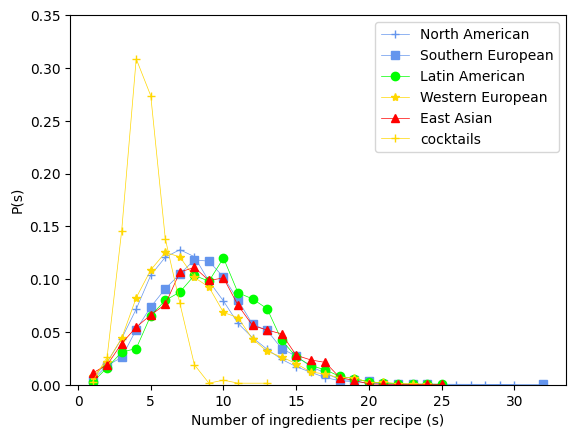

In [92]:
North_American_count_dist = (recipes_df.loc[recipes_df['region']=='NorthAmerican'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(North_American_count_dist.index, North_American_count_dist.values, '+-', c='cornflowerblue', label='North American', linewidth=.5) 

SouthernEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='SouthernEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(SouthernEuropean_count_dist.index, SouthernEuropean_count_dist.values, 's-', c='cornflowerblue', label='Southern European', linewidth=.5)

LatinAmerican_count_dist = (recipes_df.loc[recipes_df['region']=='LatinAmerican'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(LatinAmerican_count_dist.index, LatinAmerican_count_dist.values, 'o-', c='lime', label='Latin American', linewidth=.5)


WesternEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='WesternEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(WesternEuropean_count_dist.index, WesternEuropean_count_dist.values, '*-', c='gold', label='Western European', linewidth=.5)

EastAsian_count_dist = (recipes_df.loc[recipes_df['region']=='EastAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
plt.plot(EastAsian_count_dist.index, EastAsian_count_dist.values, '^-', c='red', label='East Asian', linewidth=.5)

MiddleEastern_count_dist = (recipes_df.loc[recipes_df['region']=='MiddleEastern'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


SouthAsian_count_dist = (recipes_df.loc[recipes_df['region']=='SouthAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


SoutheastAsian_count_dist = (recipes_df.loc[recipes_df['region']=='SoutheastAsian'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


African_count_dist = (recipes_df.loc[recipes_df['region']=='African'].count(axis=1) - 1).value_counts(normalize=True).sort_index()


NorthernEuropean_count_dist = (recipes_df.loc[recipes_df['region']=='NorthernEuropean'].count(axis=1) - 1).value_counts(normalize=True).sort_index()
cocktail_count_dist = (new_df.count(axis=1)).value_counts(normalize=True).sort_index()
plt.plot(cocktail_count_dist.index, cocktail_count_dist.values, '+-', c='gold', label='cocktails', linewidth=.5)


plt.ylim([0,.35])
plt.xlabel("Number of ingredients per recipe (s)")
plt.ylabel("P(s)")
plt.legend()

plt.show()


In [61]:
cocktail_ingredient_df_counts['ingredients']

6                              lemon juice
42                   king's ginger liqueur
20              luxardo maraschino liqueur
4                             junipero gin
124                      no london dry gin
                       ...                
575     karlsson's gold vodka root-infused
576                              cardamaro
577               grade-a dark maple syrup
578                 fenteman's ginger beer
1305        grenadine 'layered' beer back 
Name: ingredients, Length: 1306, dtype: object

In [94]:
new_df.count(axis=1).sum()/new_df.shape[0]

4.707423580786026

In [80]:
unique_cocktail_ingredient = pd.unique(new_df.values.ravel('K'))
unique_cocktail_ingredient = [v for v in unique_cocktail_ingredient if v == v]


In [81]:
cocktail_prevalence = []
for i in unique_cocktail_ingredient:
    cocktail_prevalence.append(new_df[new_df.map(lambda x: x == i).any(axis=1)].shape[0]/new_df.shape[0])


In [84]:
unique_cocktail_ingredient = unique_cocktail_ingredient[1:]

In [86]:
cocktail_RankOrder = pd.DataFrame(
    {'ingredient': unique_cocktail_ingredient,
     'prevalence': cocktail_prevalence[1:]
    })
cocktail_RankOrder

,ingredient,prevalence
0,gin,0.272198
1,pisco,0.050946
2,bourbon_whiskey,0.013100
3,hop,0.030568
4,cognac,0.010189
...,...,...
185,carnation,0.001456
186,pimento,0.002911
187,wasabi,0.001456
188,artichoke,0.001456


In [87]:
cocktail_RankOrder.sort_values('prevalence', ascending=False)[:30]

,ingredient,prevalence
0,gin,0.272198
52,lemon,0.190684
5,ginger,0.186317
74,lemon_juice,0.181951
72,maple_syrup,0.138282
81,mango,0.117904
31,vermouth,0.116448
62,orange,0.110626
7,rum,0.107715
41,lime,0.107715


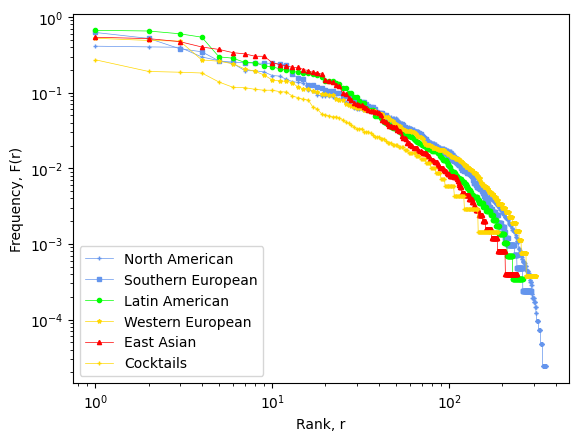

In [88]:
point_size = 3


plt.plot(range(1,NorthAmerican_RankOrder.shape[0]+1), NorthAmerican_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '+-', c='cornflowerblue', label='North American', linewidth=.5, markersize=point_size) 
plt.plot(range(1,SouthernEuropean_RankOrder.shape[0]+1), SouthernEuropean_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, 's-', c='cornflowerblue', label='Southern European', linewidth=.5, markersize=point_size)
plt.plot(range(1,LatinAmerican_RankOrder.shape[0]+1), LatinAmerican_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, 'o-', c='lime', label='Latin American', linewidth=.5, markersize=point_size)
plt.plot(range(1,WesternEuropean_RankOrder.shape[0]+1), WesternEuropean_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '*-', c='gold', label='Western European', linewidth=.5, markersize=point_size)
plt.plot(range(1,EastAsian_RankOrder.shape[0]+1), EastAsian_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '^-', c='red', label='East Asian', linewidth=.5, markersize=point_size)
plt.plot(range(1,cocktail_RankOrder.shape[0]+1), cocktail_RankOrder.sort_values(['prevalence'], ascending=False)['prevalence'].values, '+-', c='gold', label='Cocktails', linewidth=.5, markersize=point_size)




plt.xlabel("Rank, r")
plt.ylabel("Frequency, F(r)")
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.show()

In [100]:
cuisines = ['Cocktails']
random_mean_shared_compounds_cocktails = []

for j in range(10000):
    random_mean_shared_compounds_cocktails.append(get_random_mean_shared_compounds(cocktail_RankOrder, new_df))
    
print(cuisines[0] + ':', np.mean(random_mean_shared_compounds_cocktails))

Cocktails: 8.935923775113775


In [95]:
def get_mean_shared_compounds_real_cocktail(not_included_ingredients=[]):
    mean_shared_compounds_region = []
    for index, row in new_df.iterrows():
        ingredients = row[row.notna()].values
        ingredients = set(ingredients) - set(not_included_ingredients)
        ingredients = list(ingredients)
        #print(ingredients)
        n = len(ingredients)
        if n >= 2:
            ingredient_pairs = [comb[0]+','+comb[1] for comb in itertools.combinations(ingredients, 2)]
            num_shared_compounds = 0
            num_pairs = 0
            for i in ingredient_pairs:
                common_compounds = co_compound_dict.get(i, 0)
                num_shared_compounds += common_compounds
                if common_compounds > 0:
                    num_pairs += 1
            mean_shared_compounds = (2/(n*(n-1)))*num_shared_compounds
            mean_shared_compounds_region.append(mean_shared_compounds)
        
    return(mean_shared_compounds_region)

In [101]:
np.mean(get_mean_shared_compounds_real_cocktail())

7.46298048261552

In [102]:
np.mean(get_mean_shared_compounds_real_cocktail()) - np.mean(random_mean_shared_compounds_cocktails)

-1.4729432924982548

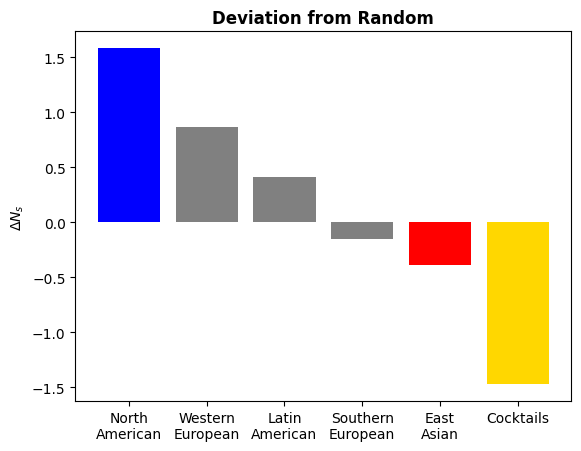

In [146]:
plt.bar(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian', 'Cocktails'],
          [np.mean(mean_shared_compounds_NorthAmerican) - np.mean(random_mean_shared_compounds_NorthAmerican),
           np.mean(mean_shared_compounds_WesternEuropean) - np.mean(random_mean_shared_compounds_WesternEuropean),
           np.mean(mean_shared_compounds_LatinAmerican) - np.mean(random_mean_shared_compounds_LatinAmerican),
           np.mean(mean_shared_compounds_SouthernEuropean) - np.mean(random_mean_shared_compounds_SouthernEuropean),
           np.mean(mean_shared_compounds_EastAsian) - np.mean(random_mean_shared_compounds_EastAsian),
           np.mean(get_mean_shared_compounds_real_cocktail()) - np.mean(random_mean_shared_compounds_cocktails)
           ], width=0.8, color=['blue', 'gray', 'gray', 'gray', 'red', 'gold'])
plt.ylabel("$ \Delta N_{s}$")
plt.title('Deviation from Random', fontweight ="bold")
plt.show()

In [103]:
z_score_cocktail = (np.mean(get_mean_shared_compounds_real_cocktail()) - np.mean(random_mean_shared_compounds_cocktails))/(np.std(random_mean_shared_compounds_cocktails)/100)
z_score_cocktail

-16.11863148497447

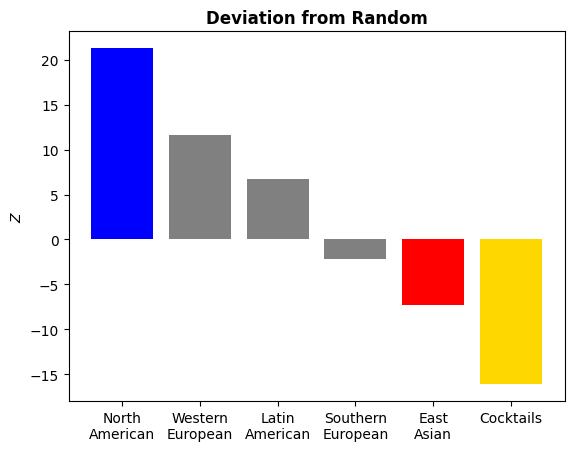

In [145]:
plt.bar(['North\nAmerican', 'Western\nEuropean', 'Latin\nAmerican', 'Southern\nEuropean', 'East\nAsian', 'Cocktails'],
          [z_score_NorthAmerican,
           z_score_WesternEuropean,
           z_score_LatinAmerican,
           z_score_SouthernEuropean,
           z_score_EastAsian,
           z_score_cocktail
           ], width=0.8, color=['blue', 'gray', 'gray', 'gray', 'red', 'gold'])

plt.ylabel("$ Z $")
plt.title('Deviation from Random', fontweight ="bold")
plt.show()

In [104]:
cocktail_frequency = []
for i in cocktail_RankOrder['ingredient']:
    cocktail_frequency.append(new_df[new_df.map(lambda x: x == i).any(axis=1)].shape[0])
cocktail_RankOrder['frequency'] = cocktail_frequency

In [109]:
contributions = []
for i in cocktail_RankOrder['ingredient']:
    contribution = get_real_ingredient_average_contribution(i, cocktail_RankOrder, new_df) - get_random_ingredient_average_contribution(i, cocktail_RankOrder, new_df)
    contributions.append(contribution)

In [110]:
cocktail_RankOrder['contribution'] = contributions
cocktail_RankOrder.sort_values('contribution', ascending=False)

,ingredient,prevalence,frequency,contribution
40,sherry,0.039301,27,0.088654
5,ginger,0.186317,128,0.070506
16,whiskey,0.081514,56,0.063706
24,brown_rice,0.004367,3,0.054100
17,cream,0.037846,26,0.041457
...,...,...,...,...
11,wine,0.085881,59,-0.096985
0,gin,0.272198,187,-0.107013
41,lime,0.107715,74,-0.150509
15,apple,0.101892,70,-0.166720


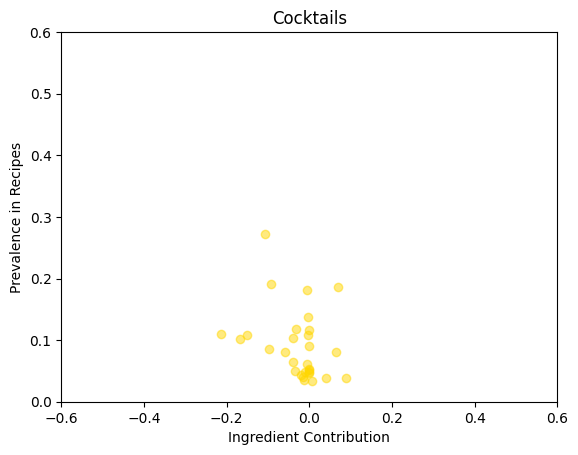

In [164]:
plt.scatter(cocktail_RankOrder.sort_values('prevalence', ascending=False)[:30]['contribution'], cocktail_RankOrder.sort_values('prevalence', ascending=False)[:30]['prevalence'], c='gold', alpha=0.5)
plt.xlim([-.6,.6])
plt.ylim([0,.6])
plt.xlabel("Ingredient Contribution")
plt.ylabel("Prevalence in Recipes")
plt.title("Cocktails")
plt.show()

In [112]:
cocktail_RankOrder.sort_values('contribution', ascending=False)[:30]

,ingredient,prevalence,frequency,contribution
40,sherry,0.039301,27,0.088654
5,ginger,0.186317,128,0.070506
16,whiskey,0.081514,56,0.063706
24,brown_rice,0.004367,3,0.054100
17,cream,0.037846,26,0.041457
73,berry,0.021834,15,0.033524
27,cheese,0.023290,16,0.031068
76,milk,0.017467,12,0.027641
44,coffee,0.013100,9,0.020157
66,ham,0.014556,10,0.014498


In [119]:
mean_shared_compounds_w_removal = []
cocktail_RankOrder_sorted = cocktail_RankOrder.sort_values('contribution', ascending=True)
for i in range(0, 31):
    removed_ingredients = cocktail_RankOrder_sorted[:i]['ingredient'].values
    #print(removed_ingredients)
    mean_shared_compounds_w_removal.append(np.mean(get_mean_shared_compounds_real_cocktail(removed_ingredients)))


In [120]:
random_mean_shared_compounds_w_removal = []
random_mean_shared_compounds_w_removal_sd = []

for i in range(0, 31):
    print(i)
    removed_ingredients = cocktail_RankOrder_sorted[:i]['ingredient'].values
    random_recipe_overlap_w_removal = []
    for j in range(10000):
        random_recipe_overlap_w_removal.append(get_random_mean_shared_compounds(cocktail_RankOrder, new_df, removed_ingredients))
    #print(removed_ingredients)
    random_mean_shared_compounds_w_removal.append(np.mean(random_recipe_overlap_w_removal))
    random_mean_shared_compounds_w_removal_sd.append(np.std(random_recipe_overlap_w_removal))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [121]:
z_score_removed_cocktail = (np.array(mean_shared_compounds_w_removal) - np.array(random_mean_shared_compounds_w_removal))/(np.array(random_mean_shared_compounds_w_removal_sd)/100)
z_score_removed_cocktail

array([-16.15037212, -14.23204522, -16.22845544, -12.67361746,
       -15.5640273 , -14.60628485, -14.26729038, -13.92512391,
       -13.12388343, -12.6419779 , -14.9882615 , -13.40295904,
       -13.33948235, -15.26742372, -11.87454895, -12.63113889,
       -13.25206318, -13.16679553, -13.81178235, -12.01855997,
       -10.42316663,  -9.75219961, -10.6361148 ,  -9.60146131,
        -8.71022378,  -7.65356169,  -6.51232385,  -8.18063433,
        -7.56294505,  -7.32357428,  -6.65779531])

Text(0.5, 1.0, 'Cocktails')

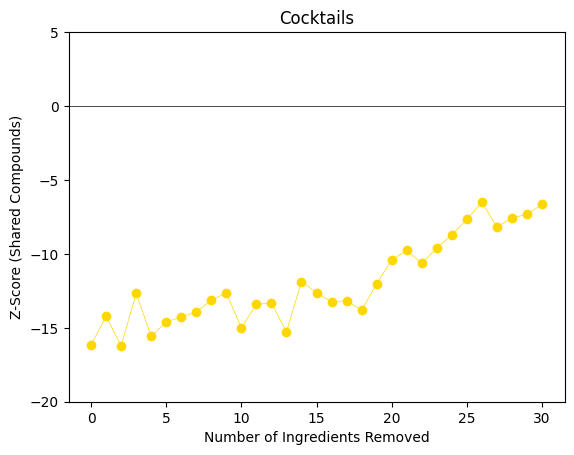

In [123]:
plt.axhline(y=0, color='black', linestyle='-', linewidth=.5)
plt.plot(range(0,31), z_score_removed_cocktail, 'o-', c='gold', label='Cocktail', linewidth=.5) 
plt.ylim([-20,5])
plt.xlabel("Number of Ingredients Removed")
plt.ylabel("Z-Score (Shared Compounds)")
plt.title("Cocktails")

In [193]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,maple_syrup,lime_juice,soda_water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gin,berry,lemon_juice,berry,,,mint,NaN,NaN,NaN,NaN,NaN,NaN
2,pisco,lemon_juice,apple,lemon,oat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pisco,vermouth,,apple,absinthe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,tea,pisco,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,,vermouth,gin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,wine,jamaican_rum,cacao,,,olive,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,,sherry,,lemon_juice,honey,wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,whiskey,nut,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
cocktail_RankOrder.sort_values('prevalence', ascending=False)[:30]

,ingredient,prevalence,frequency,contribution
0,gin,0.272198,187,-0.107013
52,lemon,0.190684,131,-0.092501
5,ginger,0.186317,128,0.070506
74,lemon_juice,0.181951,125,-0.004691
72,maple_syrup,0.138282,95,-0.002572
81,mango,0.117904,81,-0.031868
31,vermouth,0.116448,80,0.000000
62,orange,0.110626,76,-0.214211
7,rum,0.107715,74,-0.003667
41,lime,0.107715,74,-0.150509


In [ ]:
#gin, rum, whiskey, vodka, tequila

In [196]:
new_df[new_df.map(lambda x: x == 'gin').any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,gin,berry,lemon_juice,berry,,,mint,NaN,NaN,NaN,NaN,NaN,NaN
5,gin,maple_syrup,sherry,lemon_juice,absinthe,,hop,NaN,NaN,NaN,NaN,NaN,NaN
12,gin,apple,strawberry,mint,lemon,lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,gin,lime,orange_juice,cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,,gin,apple,lemon_juice,fennel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,gin,maple_syrup,lime_juice,mint,club_soda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,gin,tonic_water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,gin,ginger,fruit,maple_syrup,lemon,soda_water,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,gin,chamomile,brandy,maple_syrup,fruit,lemon_juice,ginger,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
new_df[new_df.map(lambda x: x == 'rum').any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12
16,rum,rum,rum,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,rum,amaretto,falernum,lemon_juice,apple,orange,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,rum,,lime,maple_syrup,fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,wine,rum,cherry,orange,lemon_juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,raisin,fruit,milk,rum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,rum,ginger,ginger,lime_juice,fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,amaretto,cream,rum,gin,rum,fruit,apple,NaN,NaN,NaN,NaN,NaN,NaN
643,rum,orange,oat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,rum,hazelnut,cherry,lemon,cherry,egg,wasabi,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
gin_recipes_df = new_df[new_df.map(lambda x: x == 'gin').any(axis=1)].reset_index()


unique_gin = pd.unique(gin_recipes_df.values.ravel('K'))
unique_gin = [v for v in unique_gin if v == v]

gin_prevalence = []
for i in unique_gin:
    gin_prevalence.append(gin_recipes_df[gin_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/gin_recipes_df.shape[0])

gin_RankOrder = pd.DataFrame(
    {'ingredient': unique_gin,
     'prevalence': gin_prevalence
    })

In [237]:
gin_RankOrder.sort_values('prevalence', ascending=False)[:30]

,ingredient,prevalence
187,gin,1.000000
188,,0.363636
211,lemon,0.224599
213,lemon_juice,0.219251
191,vermouth,0.197861
196,ginger,0.149733
203,fruit,0.144385
208,maple_syrup,0.139037
216,orange,0.139037
269,mango,0.106952


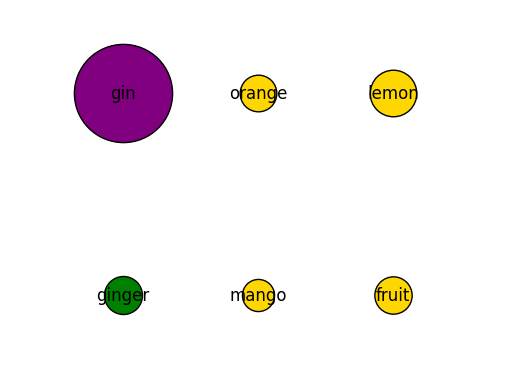

In [267]:
plt.subplot(221)
nx.draw(ingredient_g.subgraph('gin'),
        node_color='purple', 
        edgecolors='black', 
        with_labels=True, 
        node_size = gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000)

plt.subplot(222)
nx.draw(ingredient_g.subgraph('lemon'),
        node_color='gold', edgecolors='black',
        with_labels=True, 
        node_size = gin_RankOrder[gin_RankOrder['ingredient']=='lemon']['prevalence'].values*5000)

plt.subplot(223)
nx.draw(ingredient_g.subgraph('ginger'),
        node_color='g',edgecolors='black', 
        node_size = gin_RankOrder[gin_RankOrder['ingredient']=='ginger']['prevalence'].values*5000,
        with_labels=True)

plt.subplot(224)
#H=G.to_directed()
nx.draw(ingredient_g.subgraph('fruit'),
        node_color='gold',
        edgecolors='black', 
        node_size = gin_RankOrder[gin_RankOrder['ingredient']=='fruit']['prevalence'].values*5000,
        with_labels=True)

plt.subplot(211)
#H=G.to_directed()
nx.draw(ingredient_g.subgraph('orange'),
        node_color='gold',edgecolors='black', 
        node_size = gin_RankOrder[gin_RankOrder['ingredient']=='orange']['prevalence'].values*5000,
        with_labels=True)

plt.subplot(212)
#H=G.to_directed()
nx.draw(ingredient_g.subgraph('mango'),
        node_color='gold',
        edgecolors='black', 
        node_size = gin_RankOrder[gin_RankOrder['ingredient']=='mango']['prevalence'].values*5000,
        with_labels=True)



plt.show()

In [220]:
len(unique_gin)

300

In [203]:
common_flavors_df.loc[common_flavors_df['ingredient_1']=='gin']

,ingredient_1,ingredient_2,#
81,gin,sauerkraut,2
2880,gin,pork_sausage,6
3251,gin,tobacco_oil,1
3671,gin,peach,4
4120,gin,meat,4
...,...,...,...
218243,gin,lime,6
218947,gin,lantana_camara_oil,1
219955,gin,strawberry,10
220315,gin,katsuobushi,1


In [218]:
gin_adj = pd.DataFrame(0, index=range(gin_recipes_df.shape[0]), columns=unique_gin)
gin_adj

,1,5,12,14,15,19,22,30,32,35,...,kiwi,cucumber,citrus,oat,raspberry,beef,fish,cheese,carnation,barley
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
for index, i in gin_recipes_df.iterrows():
    for j in i:
        if not pd.isna(j):
            gin_adj.at[index, j] += 1
gin_adj

,1,5,12,14,15,19,22,30,32,35,...,kiwi,cucumber,citrus,oat,raspberry,beef,fish,cheese,carnation,barley
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
gin_co_occurence = gin_adj.T.dot(gin_adj)
gin_co_occurence

,1,5,12,14,15,19,22,30,32,35,...,kiwi,cucumber,citrus,oat,raspberry,beef,fish,cheese,carnation,barley
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
beef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
fish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
cheese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
carnation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [230]:
stacked_df = gin_co_occurence.stack()
sorted_stacked = stacked_df.sort_values(ascending=False)

# Select top entries along with their row and column names
top_entries = sorted_stacked.head(40)  # Change 5 to however many top entries you want to retrieve
top_entries_with_names = pd.DataFrame({
    'Row': [idx[0] for idx in top_entries.index],
    'Column': [idx[1] for idx in top_entries.index],
    'Value': top_entries.values
})

print(top_entries_with_names)

            Row       Column  Value
0           gin          gin    190
1                                95
2                        gin     77
3           gin                  77
4         lemon        lemon     54
5      vermouth     vermouth     46
6         lemon          gin     46
7           gin        lemon     46
8   lemon_juice          gin     41
9   lemon_juice  lemon_juice     41
10          gin  lemon_juice     41
11          gin     vermouth     40
12     vermouth          gin     40
13        fruit        fruit     33
14       orange       orange     32
15       ginger       ginger     31
16          gin        fruit     29
17          gin       ginger     29
18        fruit          gin     29
19       ginger          gin     29
20       orange          gin     28
21          gin       orange     28
22  maple_syrup  maple_syrup     26
23  maple_syrup          gin     26
24          gin  maple_syrup     26
25        mango        mango     23
26          gin        mango

In [ ]:
#authors used 6
#gin and lemon
#gin and fruit
#gin and ginger 
#orange and gin 
#gin and mango
#gin and apple

In [244]:
common_flavors_df.loc[common_flavors_df['ingredient_1']=='fruit']

,ingredient_1,ingredient_2,#
889,fruit,melon,9
1289,fruit,safflower_seed,2
2157,fruit,mace,2
2550,fruit,limburger_cheese,1
2898,fruit,japanese_peppermint,2
...,...,...,...
214961,fruit,spearmint,1
215866,fruit,peach,9
218037,fruit,guinea_pepper,2
218280,fruit,mountain_papaya,9


<Figure size 1800x1400 with 0 Axes>

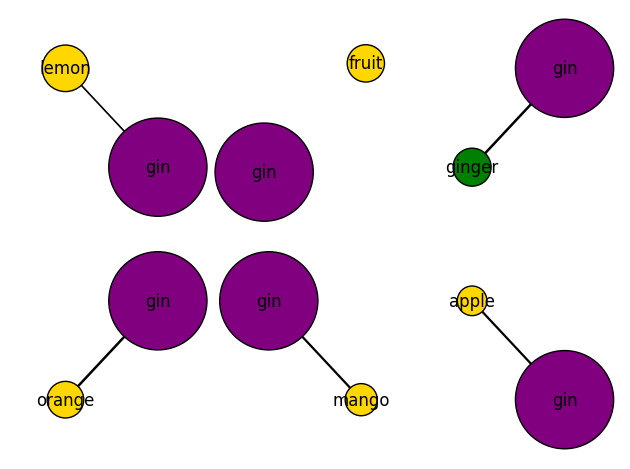

In [271]:
plt.figure(figsize=(18, 14))
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat

nx.draw(ingredient_g.subgraph(['gin', 'lemon']),
        node_color=['gold' , 'purple'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [gin_RankOrder[gin_RankOrder['ingredient']=='lemon']['prevalence'].values*5000,gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000],
        ax=ax[0],
        width=[ingredient_g.subgraph(['gin', 'lemon']).edges[['gin', 'lemon']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['gin', 'fruit']),
        node_color=['gold', 'purple'], edgecolors='black',
        with_labels=True, 
        node_size = [gin_RankOrder[gin_RankOrder['ingredient']=='fruit']['prevalence'].values*5000, gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000],
        ax=ax[1])


nx.draw(ingredient_g.subgraph(['gin', 'ginger']),
        node_color=['green', 'purple'],edgecolors='black', 
        node_size = [gin_RankOrder[gin_RankOrder['ingredient']=='ginger']['prevalence'].values*5000, gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[2],
        width=[ingredient_g.subgraph(['gin', 'ginger']).edges[['gin', 'ginger']].get('weight')/5])



nx.draw(ingredient_g.subgraph(['gin', 'orange']),
        node_color=['purple', 'gold'],
        edgecolors='black', 
        node_size = [gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000, gin_RankOrder[gin_RankOrder['ingredient']=='orange']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[3],
        width=[ingredient_g.subgraph(['gin', 'orange']).edges[['gin', 'orange']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['gin', 'mango']),
        node_color=['gold', 'purple'],edgecolors='black', 
        node_size = [gin_RankOrder[gin_RankOrder['ingredient']=='mango']['prevalence'].values*5000, gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[4],
        width=[ingredient_g.subgraph(['gin', 'mango']).edges[['gin', 'mango']].get('weight')/5])



nx.draw(ingredient_g.subgraph(['gin', 'apple']),
        node_color=['gold', 'purple'],
        edgecolors='black', 
        node_size = [gin_RankOrder[gin_RankOrder['ingredient']=='apple']['prevalence'].values*5000, gin_RankOrder[gin_RankOrder['ingredient']=='gin']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[5],
        width=[ingredient_g.subgraph(['gin', 'apple']).edges[['gin', 'apple']].get('weight')/5])


for a in ax:
    a.margins(.5)
fig.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()

In [291]:
(ingredient_g.subgraph(['gin', 'lemon']).edges[['gin', 'lemon']].get('weight') +\
0 +\
ingredient_g.subgraph(['gin', 'ginger']).edges[['gin', 'ginger']].get('weight')+\
ingredient_g.subgraph(['gin', 'orange']).edges[['gin', 'orange']].get('weight')+\
ingredient_g.subgraph(['gin', 'mango']).edges[['gin', 'mango']].get('weight')+\
ingredient_g.subgraph(['gin', 'apple']).edges[['gin', 'apple']].get('weight'))/6

6.666666666666667

In [234]:
rum_recipes_df

,index,0,1,2,3,4,5,6,7,8,9,10,11,12
0,16,rum,rum,rum,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,rum,amaretto,falernum,lemon_juice,apple,orange,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23,rum,,lime,maple_syrup,fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29,wine,rum,cherry,orange,lemon_juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,raisin,fruit,milk,rum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,635,rum,ginger,ginger,lime_juice,fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,642,amaretto,cream,rum,gin,rum,fruit,apple,NaN,NaN,NaN,NaN,NaN,NaN
71,643,rum,orange,oat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,644,rum,hazelnut,cherry,lemon,cherry,egg,wasabi,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
rum_recipes_df = new_df[new_df.map(lambda x: x == 'rum').any(axis=1)].reset_index()


unique_rum = pd.unique(rum_recipes_df.values.ravel('K'))
unique_rum = [v for v in unique_rum if v == v]

rum_prevalence = []
for i in unique_rum:
    rum_prevalence.append(rum_recipes_df[rum_recipes_df.map(lambda x: x == i).any(axis=1)].shape[0]/rum_recipes_df.shape[0])

rum_RankOrder = pd.DataFrame(
    {'ingredient': unique_rum,
     'prevalence': rum_prevalence
    })

rum_adj = pd.DataFrame(0, index=range(rum_recipes_df.shape[0]), columns=unique_rum)
rum_adj

,16,21,23,29,34,42,45,49,50,68,...,rose,passion_fruit,citrus,oregano,barley,cucumber,wasabi,nutmeg,pork,strawberry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
rum_RankOrder.sort_values('prevalence', ascending=False)[:30]

,ingredient,prevalence
74,rum,1.000000
86,,0.324324
80,ginger,0.243243
120,lemon_juice,0.202703
108,lime_juice,0.189189
110,maple_syrup,0.175676
90,lime,0.175676
95,apple,0.148649
113,cream,0.121622
83,lemon,0.121622


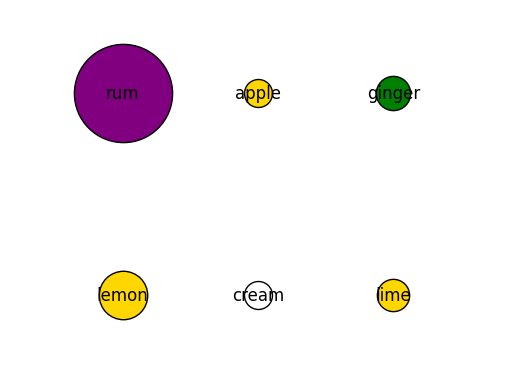

In [274]:
plt.subplot(221)
nx.draw(ingredient_g.subgraph('rum'),
        node_color='purple', 
        edgecolors='black', 
        with_labels=True, 
        node_size = rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000)

plt.subplot(222)
nx.draw(ingredient_g.subgraph('ginger'),
        node_color='g', edgecolors='black',
        with_labels=True, 
        node_size = rum_RankOrder[rum_RankOrder['ingredient']=='lemon']['prevalence'].values*5000)

plt.subplot(223)
nx.draw(ingredient_g.subgraph('lemon'),
        node_color='gold',edgecolors='black', 
        node_size = rum_RankOrder[rum_RankOrder['ingredient']=='ginger']['prevalence'].values*5000,
        with_labels=True)

plt.subplot(224)
#H=G.to_directed()
nx.draw(ingredient_g.subgraph('lime'),
        node_color='gold',
        edgecolors='black', 
        node_size = rum_RankOrder[rum_RankOrder['ingredient']=='fruit']['prevalence'].values*5000,
        with_labels=True)

plt.subplot(211)
#H=G.to_directed()
nx.draw(ingredient_g.subgraph('apple'),
        node_color='gold',edgecolors='black', 
        node_size = rum_RankOrder[rum_RankOrder['ingredient']=='orange']['prevalence'].values*5000,
        with_labels=True)

plt.subplot(212)
#H=G.to_directed()
nx.draw(ingredient_g.subgraph('cream'),
        node_color='white',
        edgecolors='black', 
        node_size = rum_RankOrder[rum_RankOrder['ingredient']=='mango']['prevalence'].values*5000,
        with_labels=True)



plt.show()

In [236]:
for index, i in rum_recipes_df.iterrows():
    for j in i:
        if not pd.isna(j):
            rum_adj.at[index, j] += 1

rum_co_occurence = rum_adj.T.dot(rum_adj)

stacked_df = rum_co_occurence.stack()
sorted_stacked = stacked_df.sort_values(ascending=False)

# Select top entries along with their row and column names
top_entries = sorted_stacked.head(40)  # Change 5 to however many top entries you want to retrieve
top_entries_with_names = pd.DataFrame({
    'Row': [idx[0] for idx in top_entries.index],
    'Column': [idx[1] for idx in top_entries.index],
    'Value': top_entries.values
})

print(top_entries_with_names)

            Row       Column  Value
0           rum          rum     94
1                        rum     33
2           rum                  33
3                                33
4        ginger       ginger     27
5           rum       ginger     22
6        ginger          rum     22
7   lemon_juice          rum     16
8           rum  lemon_juice     16
9    lime_juice          rum     15
10          rum   lime_juice     15
11  lemon_juice  lemon_juice     15
12         lime          rum     14
13          rum         lime     14
14   lime_juice   lime_juice     14
15         lime         lime     13
16  maple_syrup  maple_syrup     13
17  maple_syrup          rum     13
18          rum  maple_syrup     13
19        apple          rum     12
20       cherry       cherry     12
21          rum        apple     12
22        apple        apple     11
23        cream          rum     10
24        fruit          rum     10
25          rum       cherry     10
26          rum        cream

In [ ]:
# rum and ginger
# lemon and rum
# lime and rum
# apple and rum
# cream and rum
# rum and cherry

<Figure size 1800x1400 with 0 Axes>

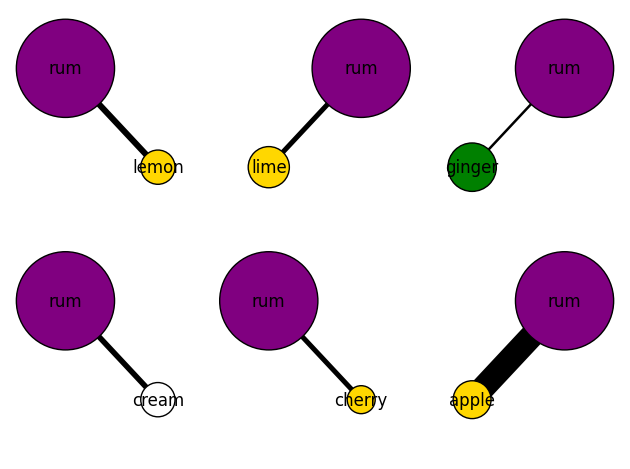

In [285]:
plt.figure(figsize=(18, 14))
fig, all_axes = plt.subplots(2, 3)
ax = all_axes.flat

nx.draw(ingredient_g.subgraph(['rum', 'lemon']),
        node_color=['gold' , 'purple'], 
        edgecolors='black', 
        with_labels=True, 
        node_size = [rum_RankOrder[rum_RankOrder['ingredient']=='lemon']['prevalence'].values*5000,rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000],
        ax=ax[0],
        width=[ingredient_g.subgraph(['rum', 'lemon']).edges[['rum', 'lemon']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['rum', 'lime']),
        node_color=['purple', 'gold'], edgecolors='black',
        with_labels=True, 
        node_size = [rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000, rum_RankOrder[rum_RankOrder['ingredient']=='lime']['prevalence'].values*5000],
        ax=ax[1],
        width=[ingredient_g.subgraph(['rum', 'lime']).edges[['rum', 'lime']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['rum', 'ginger']),
        node_color=['green', 'purple'],edgecolors='black', 
        node_size = [rum_RankOrder[rum_RankOrder['ingredient']=='ginger']['prevalence'].values*5000, rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[2],
        width=[ingredient_g.subgraph(['gin', 'ginger']).edges[['gin', 'ginger']].get('weight')/5])



nx.draw(ingredient_g.subgraph(['rum', 'cream']),
        node_color=['white', 'purple'],
        edgecolors='black', 
        node_size = [rum_RankOrder[rum_RankOrder['ingredient']=='cream']['prevalence'].values*5000, rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[3],
        width=[ingredient_g.subgraph(['rum', 'cream']).edges[['rum', 'cream']].get('weight')/5])


nx.draw(ingredient_g.subgraph(['rum', 'cherry']),
        node_color=['purple', 'gold'],edgecolors='black', 
        node_size = [rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000, rum_RankOrder[rum_RankOrder['ingredient']=='cherry']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[4],
        width=[ingredient_g.subgraph(['rum', 'cherry']).edges[['rum', 'cherry']].get('weight')/5])



nx.draw(ingredient_g.subgraph(['rum', 'apple']),
        node_color=['gold', 'purple'],
        edgecolors='black', 
        node_size = [rum_RankOrder[rum_RankOrder['ingredient']=='apple']['prevalence'].values*5000, rum_RankOrder[rum_RankOrder['ingredient']=='rum']['prevalence'].values*5000],
        with_labels=True,
        ax=ax[5],
        width=[ingredient_g.subgraph(['rum', 'apple']).edges[['rum', 'apple']].get('weight')/5])


for a in ax:
    a.margins(.5)
fig.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()

In [286]:
ingredient_g.subgraph(['rum', 'apple']).edges[['rum', 'apple']].get('weight')

86

In [287]:
ingredient_g.subgraph(['rum', 'lime']).edges[['rum', 'lime']].get('weight')

18

In [292]:
(ingredient_g.subgraph(['rum', 'apple']).edges[['rum', 'apple']].get('weight') +\
ingredient_g.subgraph(['rum', 'lime']).edges[['rum', 'lime']].get('weight') +\
ingredient_g.subgraph(['rum', 'lemon']).edges[['rum', 'lemon']].get('weight')+\
ingredient_g.subgraph(['gin', 'ginger']).edges[['gin', 'ginger']].get('weight')+\
ingredient_g.subgraph(['rum', 'cream']).edges[['rum', 'cream']].get('weight')+\
ingredient_g.subgraph(['rum', 'cherry']).edges[['rum', 'cherry']].get('weight'))/6

28.833333333333332